## Librerias

In [ ]:
import pandas as pd

from tqdm import tqdm as tqdm
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sn
import seaborn as sns
from sklearn.decomposition import PCA

from sklearn.preprocessing import MinMaxScaler

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Funciones

In [ ]:
def moving_average(df, n):
  MA = pd.Series(df['Close'].rolling(n, min_periods=n).mean(), name='MA_' + str(n))
  MA = pd.DataFrame(MA)
  MA = pd.concat([MA.loc[1], MA])
  MA = MA.reset_index()
  MA = MA.drop([0,'index'], axis=1)
  df = df.join(MA)
  return df

In [ ]:
def exponential_moving_average(df, n):
  EMA = pd.Series(df['Close'].ewm(span=n, min_periods=n).mean(), name="EMA_" + str(n))
  EMA = pd.DataFrame(EMA)
  EMA = pd.concat([EMA.loc[1], EMA])
  EMA = EMA.reset_index()
  EMA = EMA.drop([0,'index'], axis=1)
  df = df.join(EMA)
  return df

In [ ]:
def momentum(df, n):
  M = pd.Series(df['Close'].diff(n), name="Momentum_"+str(n))
  M = pd.DataFrame(M)
  M = pd.concat([M.loc[1], M])
  M = M.reset_index()
  M = M.drop([0,'index'], axis=1)
  df = df.join(M)
  return df

In [ ]:
def bollinger_bands(df, n):
  MA = pd.Series(df['Close'].rolling(n, min_periods=n).mean())
  MSD = pd.Series(df['Close'].rolling(n, min_periods=n).std())
  b1 = 4 * MSD / MA
  B1 = pd.Series(b1, name = "BollingerB_" + str(n))
  B1 = pd.DataFrame(B1)
  B1 = pd.concat([B1.loc[1], B1])
  B1 = B1.reset_index()
  B1 = B1.drop([0,'index'], axis=1)
  df = df.join(B1)
  b2 = (df['Close'] - MA  + 2 * MSD) / (4 * MSD)
  B2 = pd.Series(b2, name='Bollinger%b_'+str(n))
  B2 = pd.DataFrame(B2)
  B2 = pd.concat([B2.loc[1], B2])
  B2 = B2.reset_index()
  B2 = B2.drop([0,'index'], axis=1)
  df = df.join(B2)
  return df

In [ ]:
def stochastic_oscillator(df ,n):
  S0K = pd.Series((df['Close']- df['Low']) / (df['High']-df['Low']), name='S0k_' + str(n))
  S0K = pd.DataFrame(S0K)
  S0K = pd.concat([S0K.loc[1], S0K])
  S0K = S0K.reset_index()
  S0K = S0K.drop([0,'index'], axis=1)
  df = df.join(S0K)
  return df

In [ ]:
def relative_strength_index(df, n):
  i = 0
  UpI = [0]
  DoI = [0]

  while i + 1 <= df.index[-1]:
    UpMove = df.loc[i+1, 'High'] - df.loc[i, 'High']
    DoMove = df.loc[i+1, 'Low'] - df.loc[i, 'Low']
    if UpMove > DoMove and UpMove > 0:
      UpD = UpMove
    else:
      UpD = 0
    UpI.append(UpD)
    if DoMove > UpMove and DoMove > 0:
      DoD = DoMove
    else:
      DoD = 0
    DoI.append(DoD)
    i = i + 1

  UpI = pd.Series(UpI)
  DoI = pd.Series(DoI)
  PosDI = pd.Series(UpI.ewm(span=n, min_periods=n).mean())
  NegDI = pd.Series(DoI.ewm(span=n, min_periods=n).mean())
  RSI = pd.Series(PosDI / (PosDI + NegDI), name='RSI_' + str(n))
  RSI = pd.DataFrame(RSI)
  RSI = pd.concat([RSI.loc[1], RSI])
  RSI = RSI.reset_index()
  RSI = RSI.drop([0,'index'], axis=1)
  df = df.join(RSI)
  return df

In [ ]:
def common_channel_index(df, n):
  PP = (df['High'] + df['Low'] + df['Close']) / 3
  CCI = pd.Series((PP - PP.rolling(n, min_periods=n).mean()) / PP.rolling(n, min_periods=n).std(), name='CCI_' + str(n))
  CCI = pd.DataFrame(CCI)
  CCI = pd.concat([CCI.loc[1], CCI])
  CCI = CCI.reset_index()
  CCI = CCI.drop([0,'index'], axis=1)
  df = df.join(CCI)
  return df

In [ ]:
def standart_deviation(df, n):
  hola = pd.Series(df['Close'].rolling(n, min_periods=n).std(), name='STD_' + str(n))
  hola = pd.DataFrame(hola)
  hola = pd.concat([hola.loc[1], hola])
  hola = hola.reset_index()
  hola = hola.drop([0,'index'], axis=1)
  df.join(hola)
  return df

## Dataframe

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Inteligencia artificial/Bitcoin/df_V4.csv')

In [ ]:
df

,Unnamed: 0,Unnamed: 0.1,Open Time,Open,High,Low,Close,Volume,NumberTransactions,Close SP500,Open SP500,halving,Close Gold,Open Gold,OpenDJ,CloseDJ,Close_eth,tipoint,MA_2,EMA_2,Momentum_2,BollingerB_2,Bollinger%b_2,S0k_2,RSI_2,CCI_2,MA_3,EMA_3,Momentum_3,BollingerB_3,Bollinger%b_3,S0k_3,RSI_3,CCI_3,MA_5,EMA_5,Momentum_5,BollingerB_5,Bollinger%b_5,S0k_5,...,BollingerB_15,Bollinger%b_15,S0k_15,RSI_15,CCI_15,MA_21,EMA_21,Momentum_21,BollingerB_21,Bollinger%b_21,S0k_21,RSI_21,CCI_21,MA_105,EMA_105,Momentum_105,BollingerB_105,Bollinger%b_105,S0k_105,RSI_105,CCI_105,MA_200,EMA_200,Momentum_200,BollingerB_200,Bollinger%b_200,S0k_200,RSI_200,CCI_200,MA_300,EMA_300,Momentum_300,BollingerB_300,Bollinger%b_300,S0k_300,RSI_300,CCI_300,PIB,CPI,Tarifas
0,0,0,2015-10-11,246.30,249.50,246.30,249.50,3021.120000,104550,0.00,0.00,0,0.0,0.0,0.00,0.00,0.00,0.00,0.000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,54420.0,-0.044968,0.044267
1,1,1,2015-10-12,249.50,249.50,247.60,247.60,9493.890000,134410,2052.23,2047.93,1,1130.3,1130.3,17493.17,17574.75,0.63,0.75,0.000,0.000000,0.00,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,1.000000,0.000000,0.000000,0.000,0.000000,0.00,0.000000,0.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.00,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,1.000000,0.000000,0.000000,54420.0,-0.044968,0.044267
2,2,2,2015-10-13,247.60,252.87,245.75,250.00,12875.400000,134878,2003.69,2015.00,1,1231.7,1231.7,17113.55,17081.89,0.60,0.75,248.550,248.075000,0.00,0.021621,0.323223,0.000000,0.000000,-0.707107,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,54420.0,-0.044968,0.044267
3,3,3,2015-10-14,250.00,254.75,250.00,253.00,30115.770000,141985,1994.24,2003.66,1,1243.6,1243.6,17079.08,16924.75,0.50,0.75,248.800,249.407692,0.50,0.027284,0.676777,0.596910,0.886065,0.707107,249.033333,249.242857,0.00,0.020338,0.690856,0.596910,0.838308,1.142986,0.000,0.000000,0.00,0.000000,0.000000,0.596910,...,0.000000,0.000000,0.596910,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.596910,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.596910,0.000000,0.000000,0.00000,0.000000,0.00,0.000000,0.000000,0.596910,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.596910,0.000000,0.000000,54420.0,-0.044968,0.044267
4,4,4,2015-10-15,253.00,258.98,253.00,255.26,50535.450000,153495,2023.86,1996.47,1,1251.4,1251.4,16944.86,17141.75,0.56,0.75,251.500,251.832500,5.40,0.033739,0.676777,0.631579,0.203584,0.707107,250.200000,251.246667,3.50,0.043254,0.758727,0.631579,0.269169,1.104127,0.000,0.000000,0.00,0.000000,0.000000,0.631579,...,0.000000,0.000000,0.631579,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.631579,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.631579,0.000000,0.000000,0.00000,0.000000,0.00,0.000000,0.000000,0.631579,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.631579,0.000000,0.000000,54420.0,-0.044968,0

In [ ]:
df2 = df[1:]


In [ ]:
df2.to_csv('df_tipoint.csv')

In [ ]:
df2 = df.drop(['Open','Unnamed: 0.1','High','Low','Unnamed: 0'], axis=1)

In [ ]:
df2['fecha'] = pd.to_datetime(df['Open Time'])

In [ ]:
df2

,Open Time,Close,Volume,NumberTransactions,Close SP500,Open SP500,halving,Close Gold,Open Gold,OpenDJ,CloseDJ,Close_eth,tipoint,MA_2,EMA_2,Momentum_2,BollingerB_2,Bollinger%b_2,S0k_2,RSI_2,CCI_2,MA_3,EMA_3,Momentum_3,BollingerB_3,Bollinger%b_3,S0k_3,RSI_3,CCI_3,MA_5,EMA_5,Momentum_5,BollingerB_5,Bollinger%b_5,S0k_5,RSI_5,CCI_5,MA_8,EMA_8,Momentum_8,...,Bollinger%b_15,S0k_15,RSI_15,CCI_15,MA_21,EMA_21,Momentum_21,BollingerB_21,Bollinger%b_21,S0k_21,RSI_21,CCI_21,MA_105,EMA_105,Momentum_105,BollingerB_105,Bollinger%b_105,S0k_105,RSI_105,CCI_105,MA_200,EMA_200,Momentum_200,BollingerB_200,Bollinger%b_200,S0k_200,RSI_200,CCI_200,MA_300,EMA_300,Momentum_300,BollingerB_300,Bollinger%b_300,S0k_300,RSI_300,CCI_300,PIB,CPI,Tarifas,fecha
0,2015-10-11,249.50,3021.120000,104550,0.00,0.00,0,0.0,0.0,0.00,0.00,0.00,0.00,0.000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,54420.0,-0.044968,0.044267,2015-10-11
1,2015-10-12,247.60,9493.890000,134410,2052.23,2047.93,1,1130.3,1130.3,17493.17,17574.75,0.63,0.75,0.000,0.000000,0.00,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,1.000000,0.000000,0.000000,0.000,0.000000,0.00,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.00,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.00,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,1.000000,0.000000,0.000000,54420.0,-0.044968,0.044267,2015-10-12
2,2015-10-13,250.00,12875.400000,134878,2003.69,2015.00,1,1231.7,1231.7,17113.55,17081.89,0.60,0.75,248.550,248.075000,0.00,0.021621,0.323223,0.000000,0.000000,-0.707107,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,54420.0,-0.044968,0.044267,2015-10-13
3,2015-10-14,253.00,30115.770000,141985,1994.24,2003.66,1,1243.6,1243.6,17079.08,16924.75,0.50,0.75,248.800,249.407692,0.50,0.027284,0.676777,0.596910,0.886065,0.707107,249.033333,249.242857,0.00,0.020338,0.690856,0.596910,0.838308,1.142986,0.000,0.000000,0.00,0.000000,0.000000,0.596910,0.000000,0.000000,0.00000,0.000000,0.00,...,0.000000,0.596910,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.596910,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.596910,0.000000,0.000000,0.00000,0.000000,0.00,0.000000,0.000000,0.596910,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.596910,0.000000,0.000000,54420.0,-0.044968,0.044267,2015-10-14
4,2015-10-15,255.26,50535.450000,153495,2023.86,1996.47,1,1251.4,1251.4,16944.86,17141.75,0.56,0.75,251.500,251.832500,5.40,0.033739,0.676777,0.631579,0.203584,0.707107,250.200000,251.246667,3.50,0.043254,0.758727,0.631579,0.269169,1.104127,0.000,0.000000,0.00,0.000000,0.000000,0.631579,0.000000,0.000000,0.00000,0.000000,0.00,...,0.000000,0.631579,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.631579,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.631579,0.000000,0.000000,0.00000,0.000000,0.00,0.000000,0.000000,0.631579,0.000000,0.000000,0.000000,0.000000,0.00,0.

In [ ]:
df2['dayofweek'] = df2['fecha'].dt.dayofweek
df2['quarter'] = df2['fecha'].dt.quarter
df2['month'] = df2['fecha'].dt.month
df2['year'] = df2['fecha'].dt.year
df2['dayofyear'] = df2['fecha'].dt.dayofyear
df2['dayofmonth'] = df2['fecha'].dt.day
df2['weekofyear'] = df2['fecha'].dt.weekofyear

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.



In [ ]:
df2 = df2.drop(['Open Time','fecha'], axis=1)

In [ ]:
df2

,Close,Volume,NumberTransactions,Close SP500,Open SP500,halving,Close Gold,Open Gold,OpenDJ,CloseDJ,Close_eth,tipoint,MA_2,EMA_2,Momentum_2,BollingerB_2,Bollinger%b_2,S0k_2,RSI_2,CCI_2,MA_3,EMA_3,Momentum_3,BollingerB_3,Bollinger%b_3,S0k_3,RSI_3,CCI_3,MA_5,EMA_5,Momentum_5,BollingerB_5,Bollinger%b_5,S0k_5,RSI_5,CCI_5,MA_8,EMA_8,Momentum_8,BollingerB_8,...,Momentum_21,BollingerB_21,Bollinger%b_21,S0k_21,RSI_21,CCI_21,MA_105,EMA_105,Momentum_105,BollingerB_105,Bollinger%b_105,S0k_105,RSI_105,CCI_105,MA_200,EMA_200,Momentum_200,BollingerB_200,Bollinger%b_200,S0k_200,RSI_200,CCI_200,MA_300,EMA_300,Momentum_300,BollingerB_300,Bollinger%b_300,S0k_300,RSI_300,CCI_300,PIB,CPI,Tarifas,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
0,249.50,3021.120000,104550,0.00,0.00,0,0.0,0.0,0.00,0.00,0.00,0.00,0.000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00,0.000000,...,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,54420.0,-0.044968,0.044267,6,4,10,2015,284,11,41
1,247.60,9493.890000,134410,2052.23,2047.93,1,1130.3,1130.3,17493.17,17574.75,0.63,0.75,0.000,0.000000,0.00,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,1.000000,0.000000,0.000000,0.000,0.000000,0.00,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.00,0.000000,...,0.00,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.00,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,1.000000,0.000000,0.000000,54420.0,-0.044968,0.044267,0,4,10,2015,285,12,42
2,250.00,12875.400000,134878,2003.69,2015.00,1,1231.7,1231.7,17113.55,17081.89,0.60,0.75,248.550,248.075000,0.00,0.021621,0.323223,0.000000,0.000000,-0.707107,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00,0.000000,...,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,54420.0,-0.044968,0.044267,1,4,10,2015,286,13,42
3,253.00,30115.770000,141985,1994.24,2003.66,1,1243.6,1243.6,17079.08,16924.75,0.50,0.75,248.800,249.407692,0.50,0.027284,0.676777,0.596910,0.886065,0.707107,249.033333,249.242857,0.00,0.020338,0.690856,0.596910,0.838308,1.142986,0.000,0.000000,0.00,0.000000,0.000000,0.596910,0.000000,0.000000,0.00000,0.000000,0.00,0.000000,...,0.00,0.000000,0.000000,0.596910,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.596910,0.000000,0.000000,0.00000,0.000000,0.00,0.000000,0.000000,0.596910,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.596910,0.000000,0.000000,54420.0,-0.044968,0.044267,2,4,10,2015,287,14,42
4,255.26,50535.450000,153495,2023.86,1996.47,1,1251.4,1251.4,16944.86,17141.75,0.56,0.75,251.500,251.832500,5.40,0.033739,0.676777,0.631579,0.203584,0.707107,250.200000,251.246667,3.50,0.043254,0.758727,0.631579,0.269169,1.104127,0.000,0.000000,0.00,0.000000,0.000000,0.631579,0.000000,0.000000,0.00000,0.000000,0.00,0.000000,...,0.00,0.000000,0.000000,0.631579,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.631579,0.000000,0.000000,0.00000,0.000000,0.00,0.000000,0.000000,0.631579,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.631579,0.000000,0.000000,54420.0,-0.044968,0.044267,3,4,10,2015,288,15,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

# Separar para evaluar

## Primeras 10

In [ ]:
primeras10 = df2.iloc[:, 0:10] 

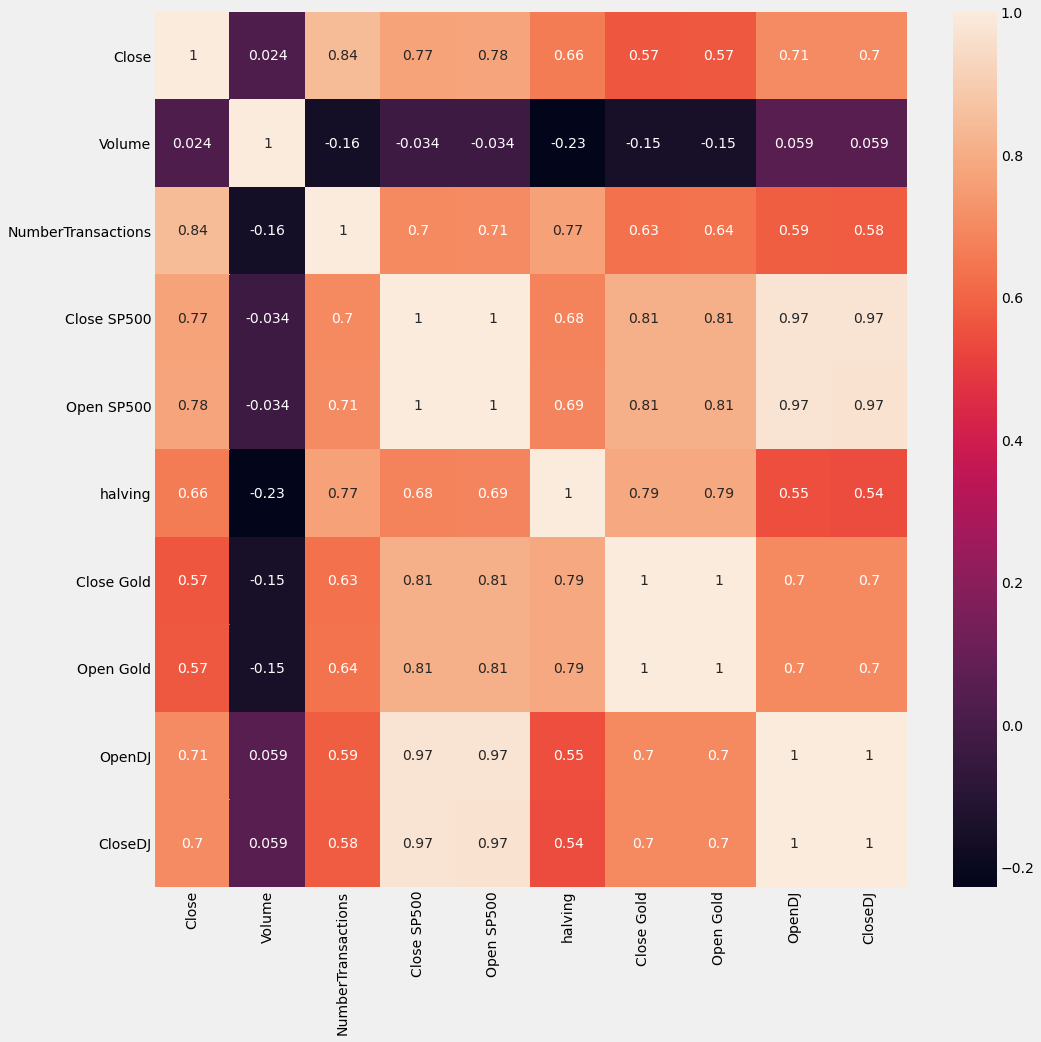

In [ ]:
corrMatrix = primeras10.corr()
plt.figure(figsize=(15,15))
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [ ]:
primeras10 = primeras10.drop(['Volume','Open Gold'], axis=1)

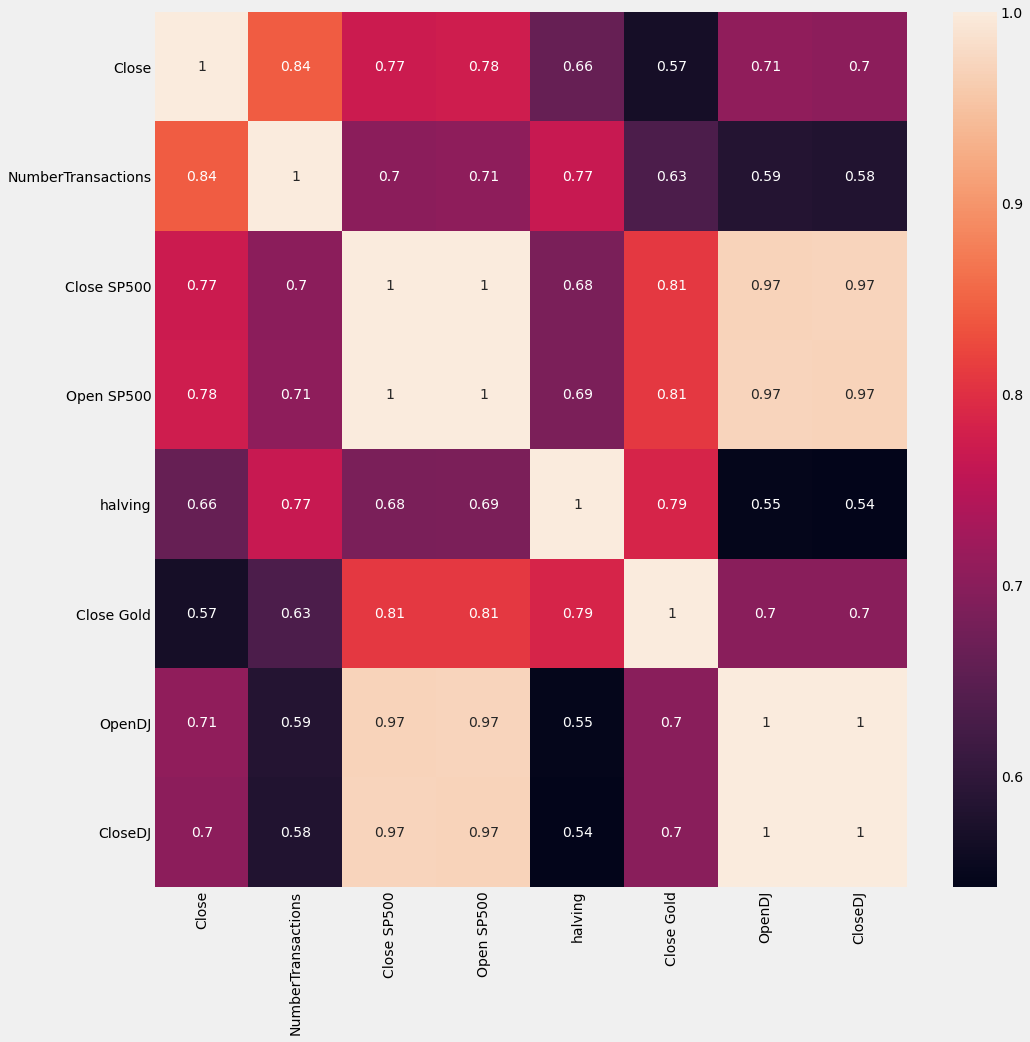

In [ ]:
corrMatrix = primeras10.corr()
plt.figure(figsize=(15,15))
sn.heatmap(corrMatrix, annot=True)
plt.show()

## 10:20

In [ ]:
primeras20 = df2.iloc[:, 10:20] 

In [ ]:
primeras20['Close'] = df2.iloc[:,0]

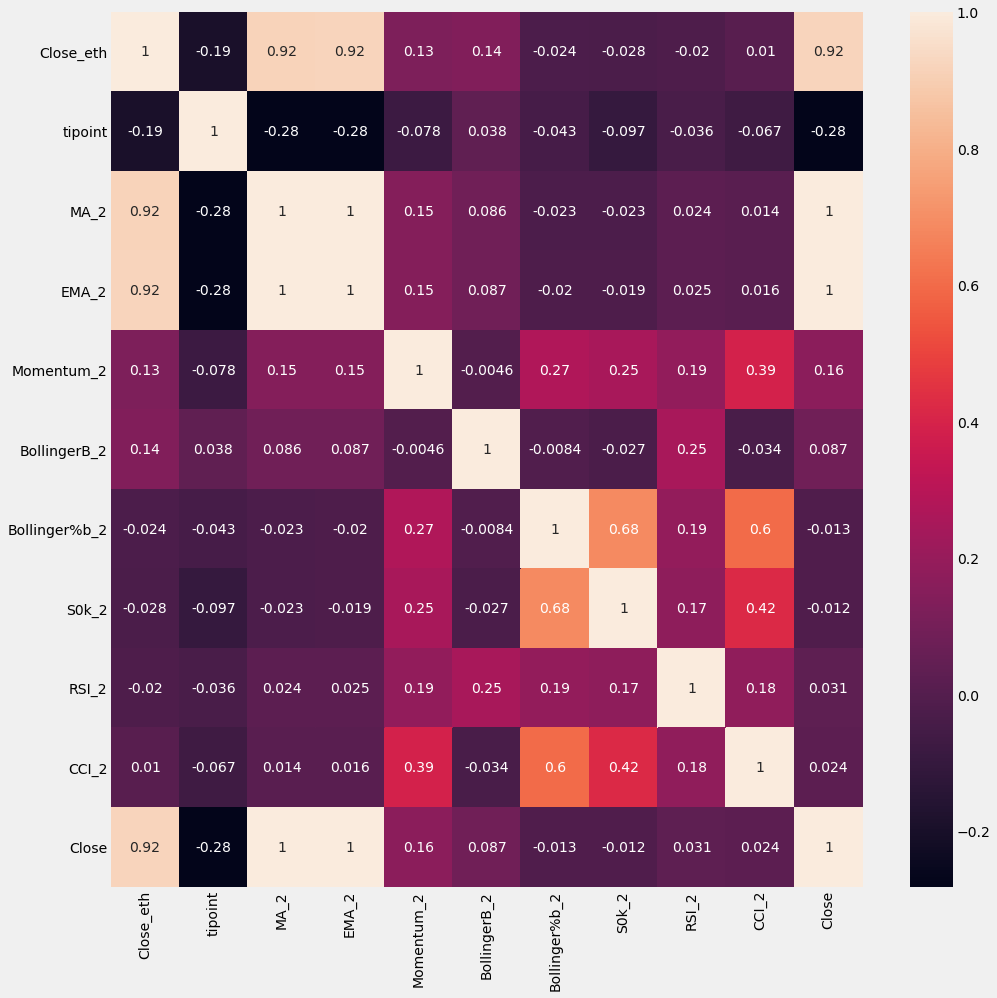

In [ ]:
corrMatrix = primeras20.corr()
plt.figure(figsize=(15,15))
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [ ]:
primeras20 = primeras20.drop(['tipoint','Momentum_2','BollingerB_2','Bollinger%b_2','S0k_2','RSI_2','CCI_2'], axis=1)

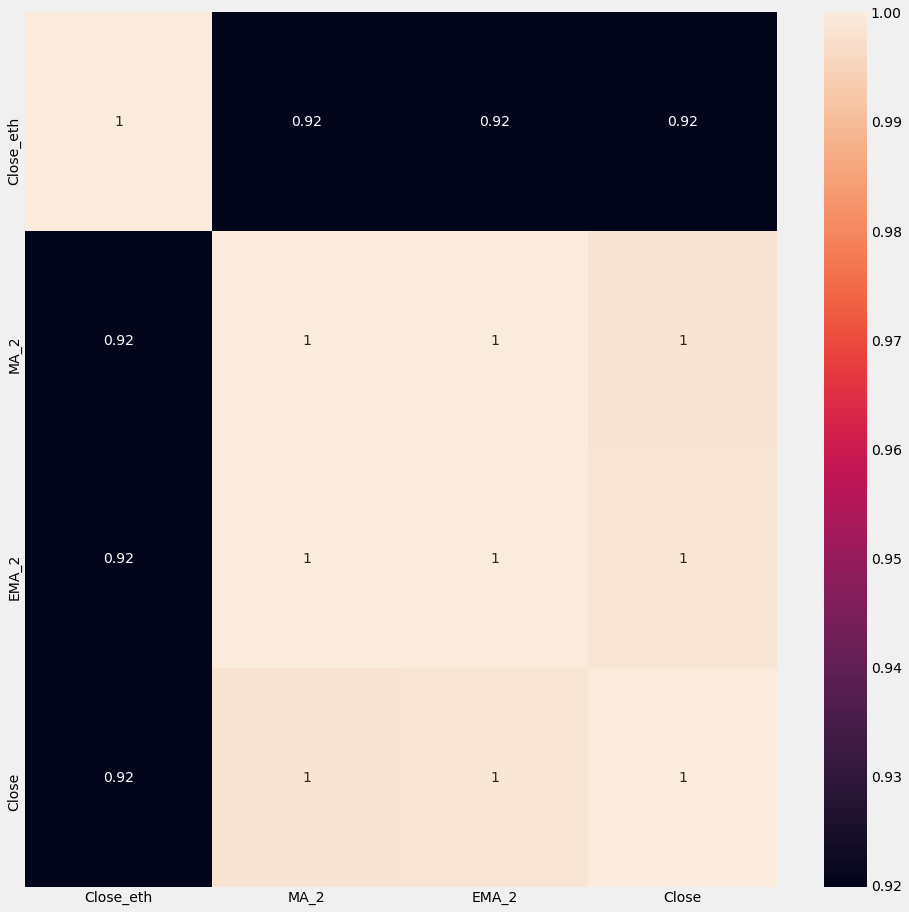

In [ ]:
corrMatrix = primeras20.corr()
plt.figure(figsize=(15,15))
sn.heatmap(corrMatrix, annot=True)
plt.show()

## 20:30

In [ ]:
primeras30 = df2.iloc[:, 20:30]

In [ ]:
primeras30['Close'] = df2.iloc[:,0]

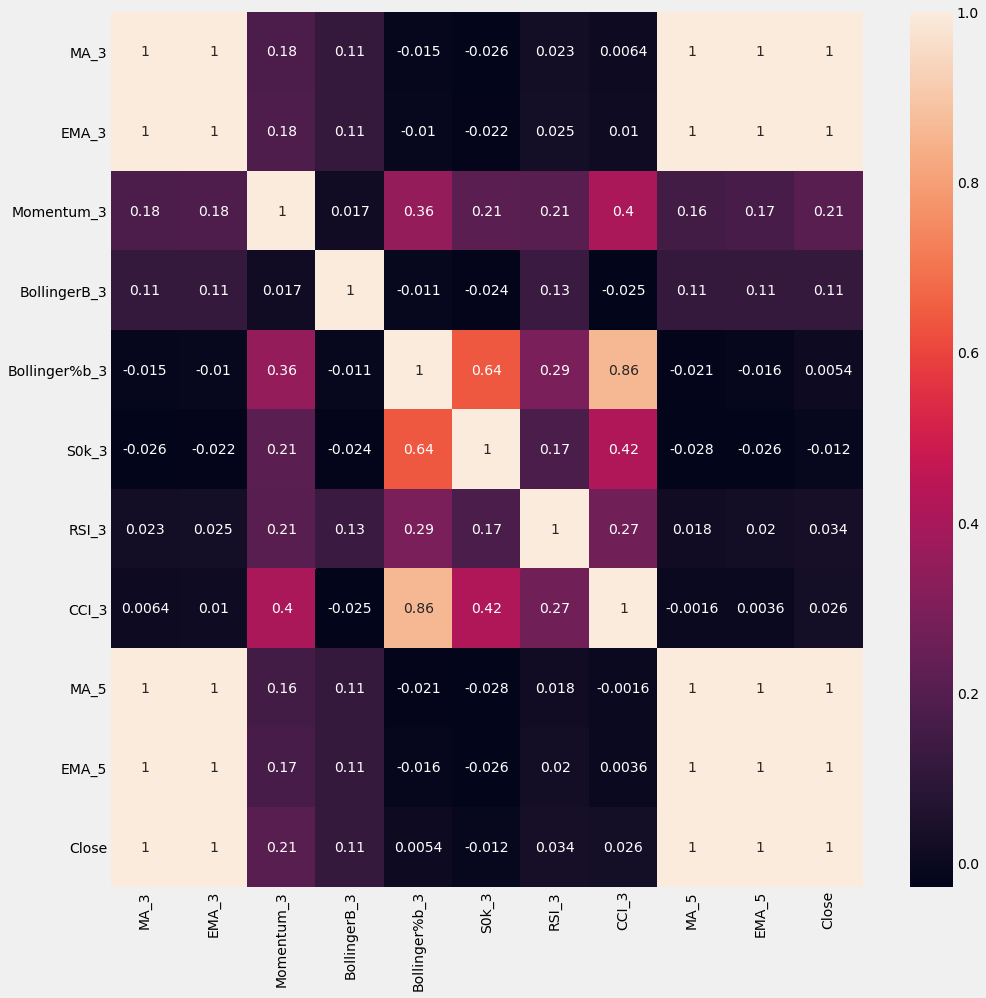

In [ ]:
corrMatrix = primeras30.corr()
plt.figure(figsize=(15,15))
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [ ]:
list(primeras30)

['MA_3',
 'EMA_3',
 'Momentum_3',
 'BollingerB_3',
 'Bollinger%b_3',
 'S0k_3',
 'RSI_3',
 'CCI_3',
 'MA_5',
 'EMA_5',
 'Close']

In [ ]:
primeras30 = primeras30.drop(['Momentum_3','BollingerB_3','S0k_3','RSI_3','CCI_3','Bollinger%b_3'], axis=1)

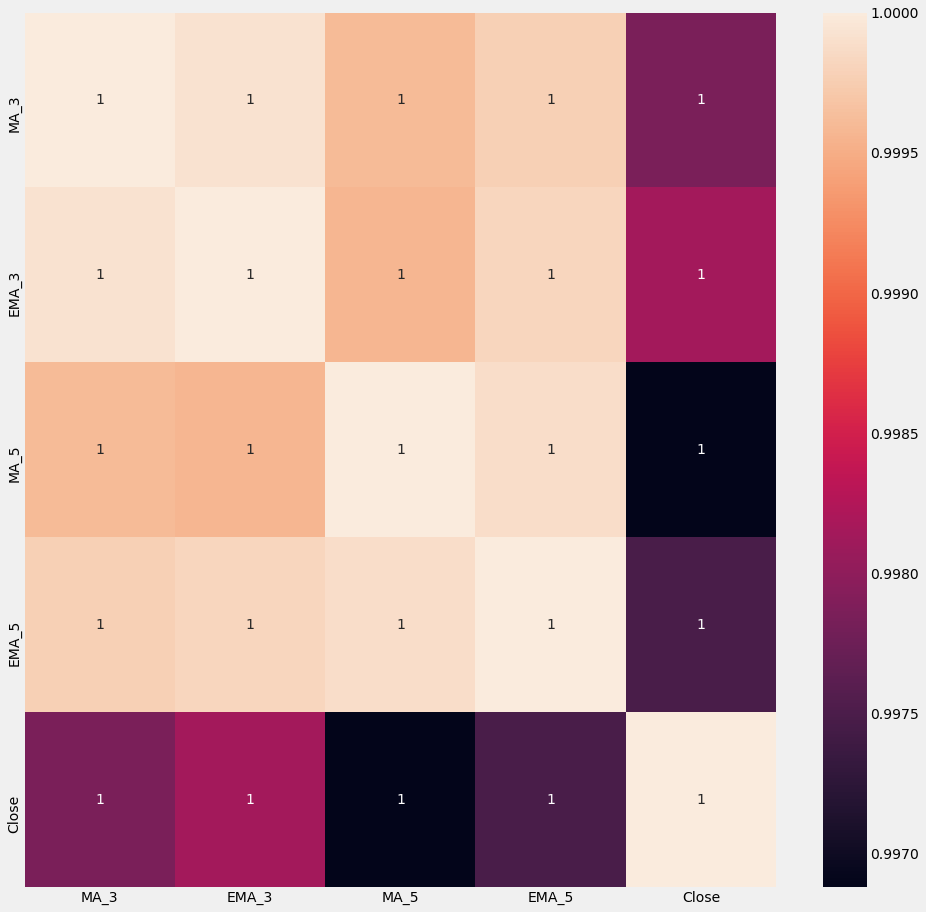

In [ ]:
corrMatrix = primeras30.corr()
plt.figure(figsize=(15,15))
sn.heatmap(corrMatrix, annot=True)
plt.show()

## 30:40

In [ ]:
primeras40 = df2.iloc[:, 30:40]

In [ ]:
primeras40['Close'] = df2.iloc[:,0]

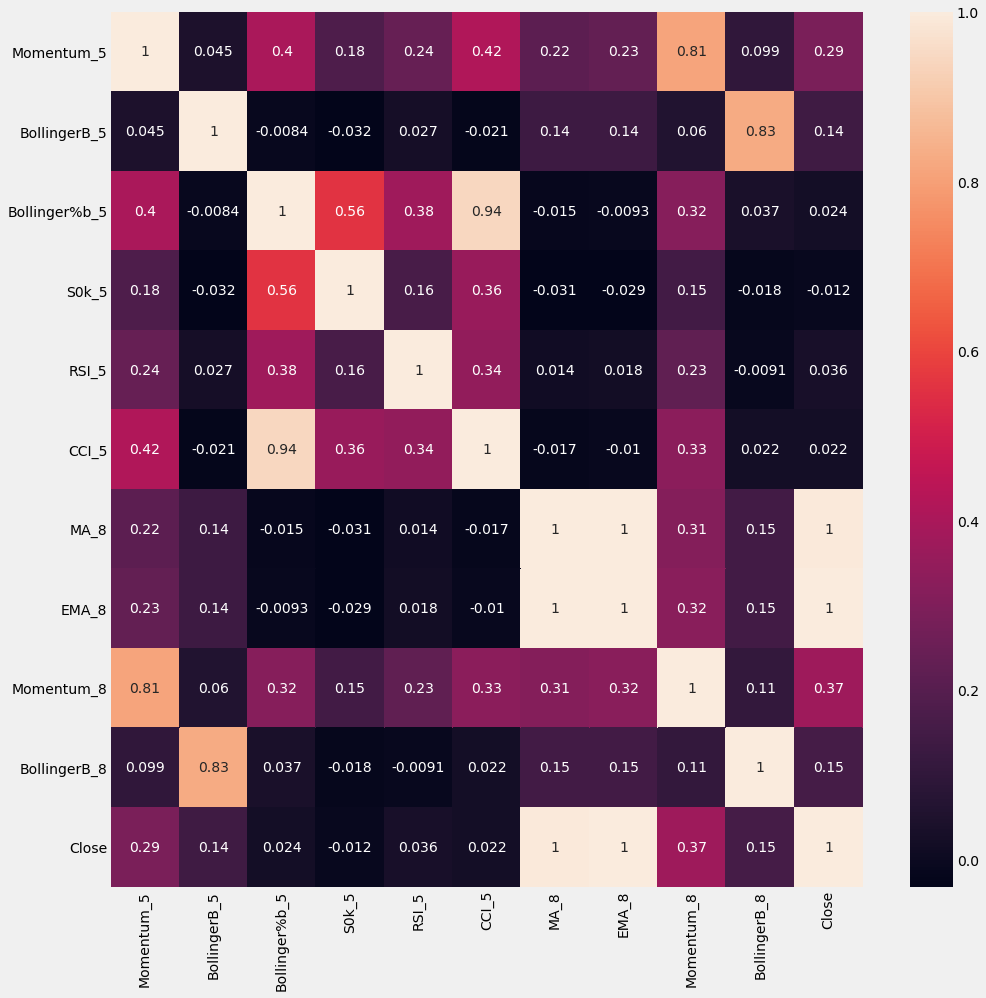

In [ ]:
corrMatrix = primeras40.corr()
plt.figure(figsize=(15,15))
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [ ]:
primeras40 = primeras40.drop(['Momentum_5','BollingerB_5','Bollinger%b_5','S0k_5','RSI_5','CCI_5','Momentum_8','BollingerB_8'], axis=1)

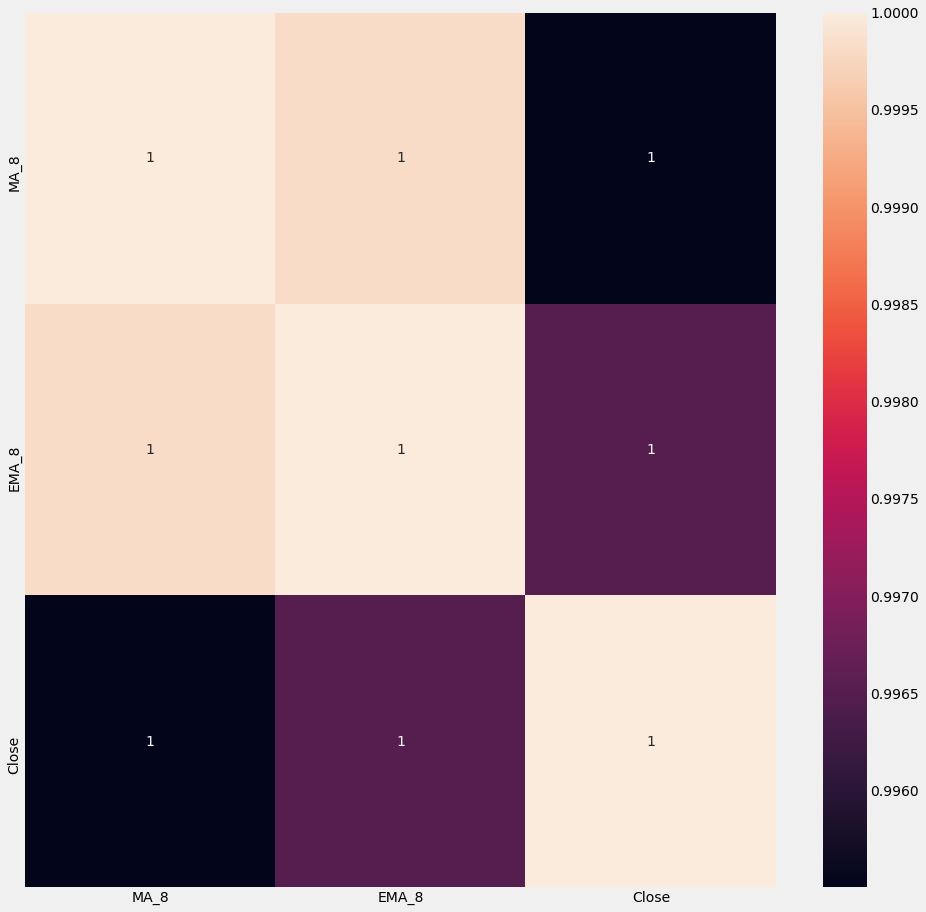

In [ ]:
corrMatrix = primeras40.corr()
plt.figure(figsize=(15,15))
sn.heatmap(corrMatrix, annot=True)
plt.show()

## 50:60

In [ ]:
primeras50 = df2.iloc[:, 50:60]

In [ ]:
primeras50['Close'] = df2.iloc[:,0]

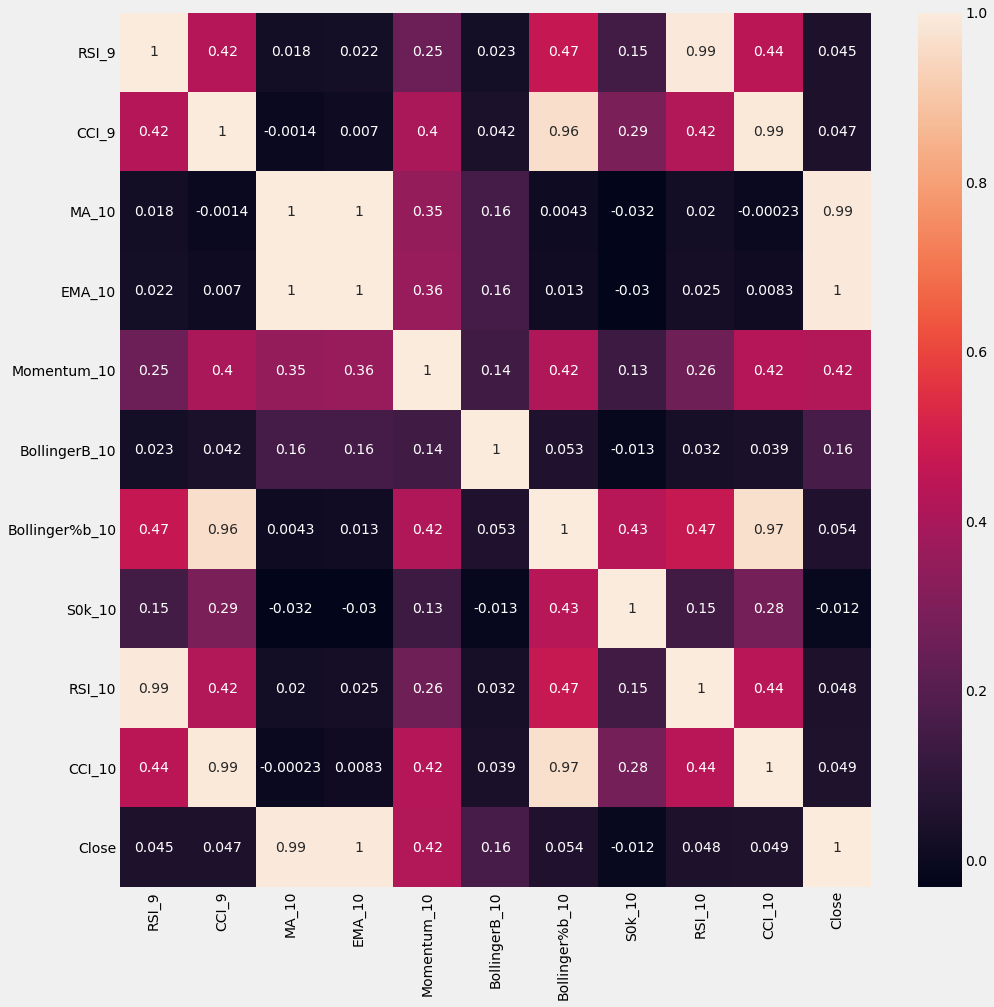

In [ ]:
corrMatrix = primeras50.corr()
plt.figure(figsize=(15,15))
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [ ]:
primeras50 = primeras50.drop(['RSI_9','CCI_9','Momentum_10','BollingerB_10','Bollinger%b_10','S0k_10','RSI_10','CCI_10'], axis=1)

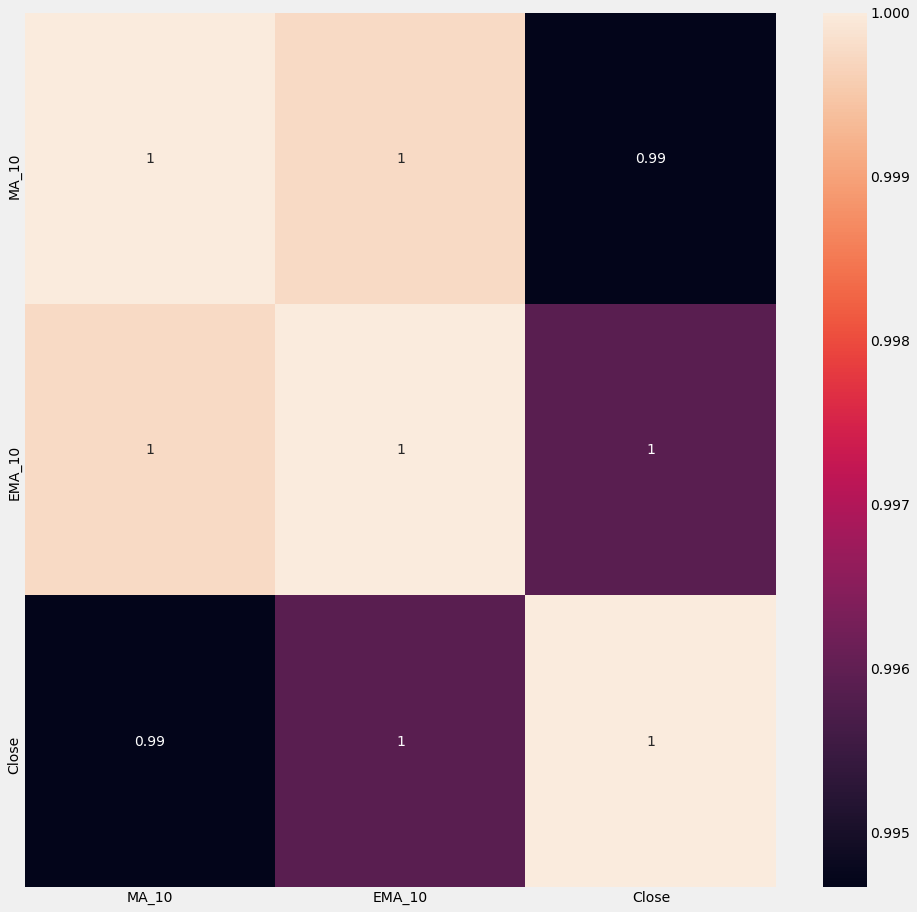

In [ ]:
corrMatrix = primeras50.corr()
plt.figure(figsize=(15,15))
sn.heatmap(corrMatrix, annot=True)
plt.show()

## 40:50

In [ ]:
primeras60 = df2.iloc[:, 40:50]

In [ ]:
primeras60['Close'] = df2.iloc[:,0]

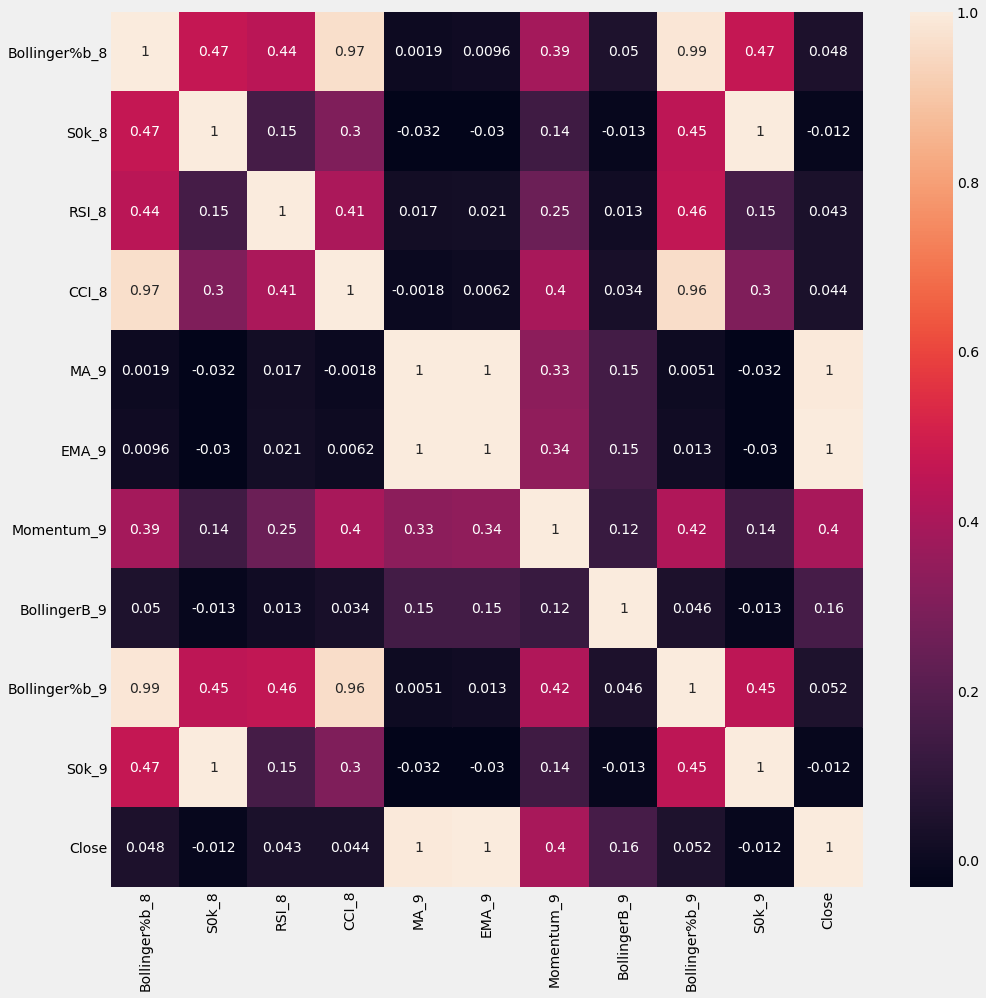

In [ ]:
corrMatrix = primeras60.corr()
plt.figure(figsize=(15,15))
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [ ]:
primeras60 = primeras60.drop(['Bollinger%b_8','S0k_8','RSI_8','CCI_8','Momentum_9','BollingerB_9','S0k_9','Bollinger%b_9'], axis=1)

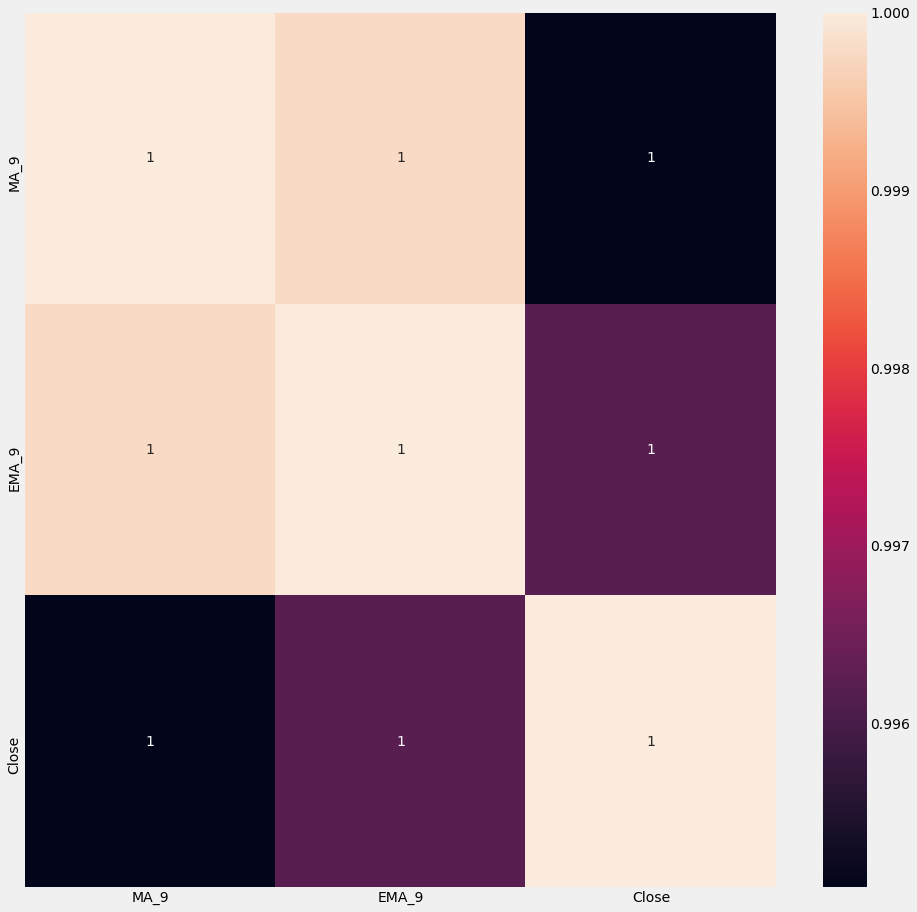

In [ ]:
corrMatrix = primeras60.corr()
plt.figure(figsize=(15,15))
sn.heatmap(corrMatrix, annot=True)
plt.show()

## 60:70

In [ ]:
primeras70 = df2.iloc[:, 60:70]

In [ ]:
primeras70['Close'] = df2.iloc[:,0]

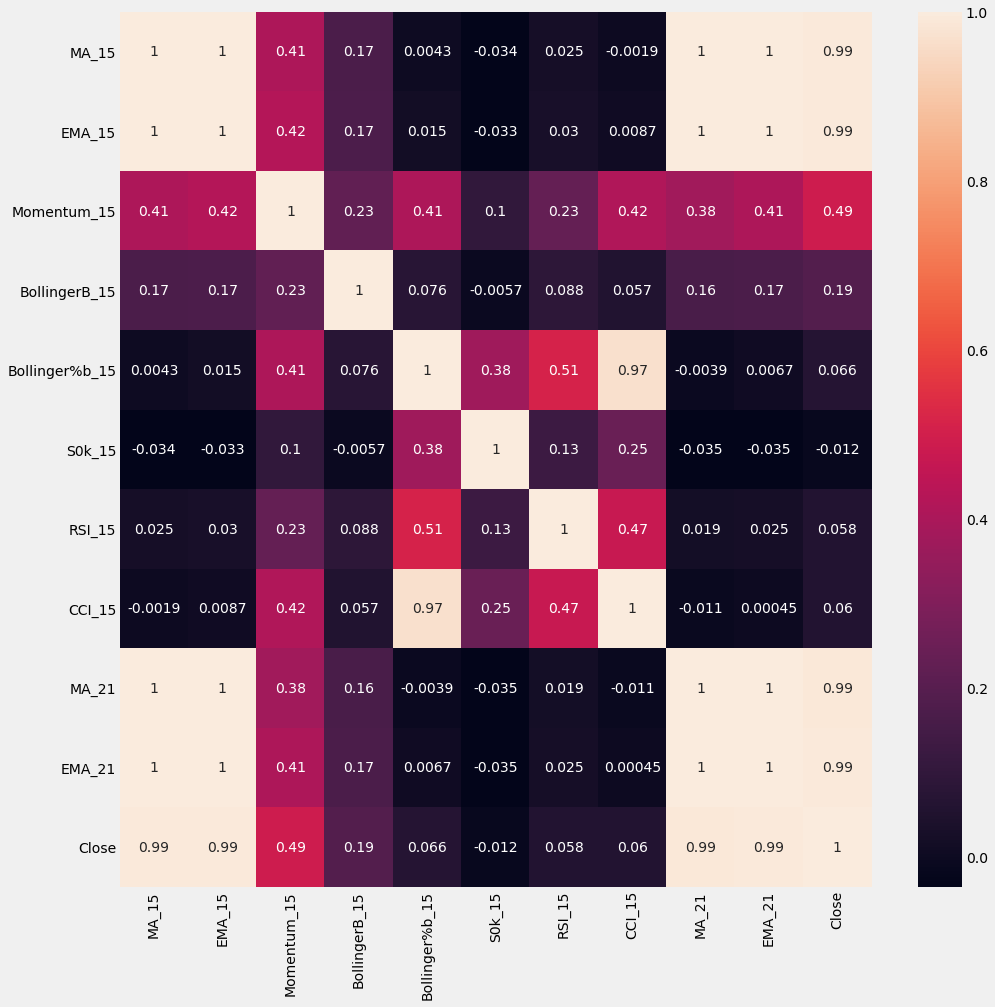

In [ ]:
corrMatrix = primeras70.corr()
plt.figure(figsize=(15,15))
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [ ]:
primeras70 = primeras70.drop(['BollingerB_15','Bollinger%b_15','S0k_15','RSI_15','CCI_15'], axis=1)

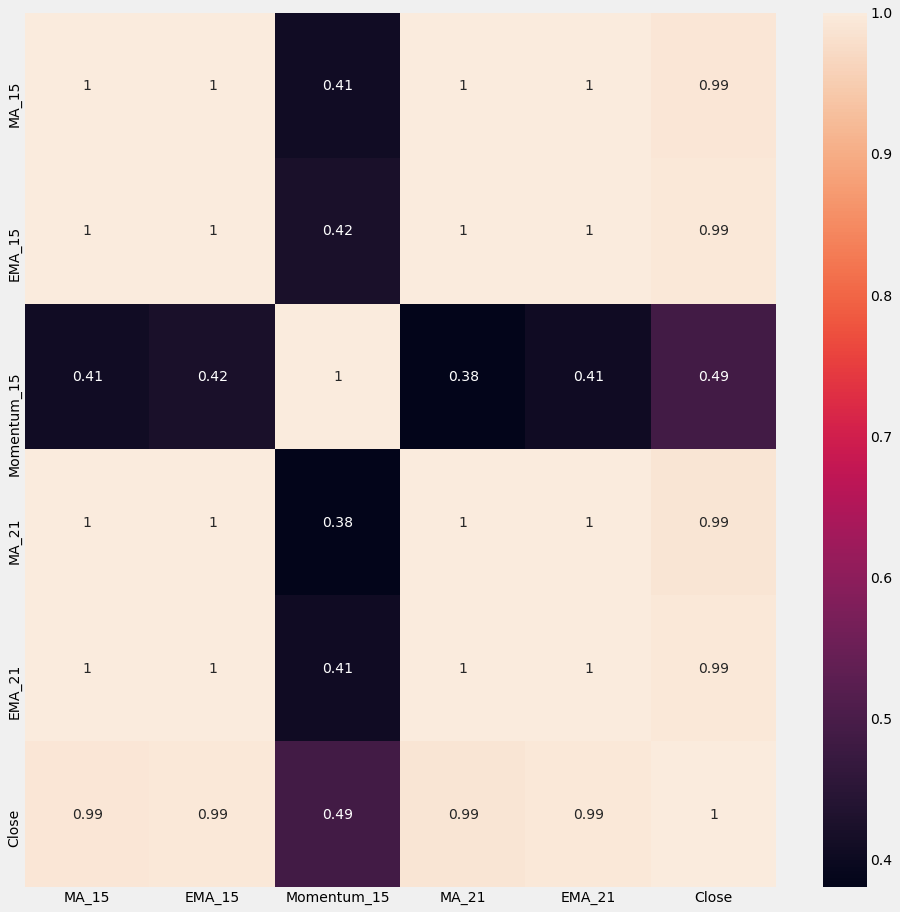

In [ ]:
corrMatrix = primeras70.corr()
plt.figure(figsize=(15,15))
sn.heatmap(corrMatrix, annot=True)
plt.show()

## 70:80

In [ ]:
primeras80 = df2.iloc[:, 70:80]

In [ ]:
primeras80['Close'] = df2.iloc[:,0]

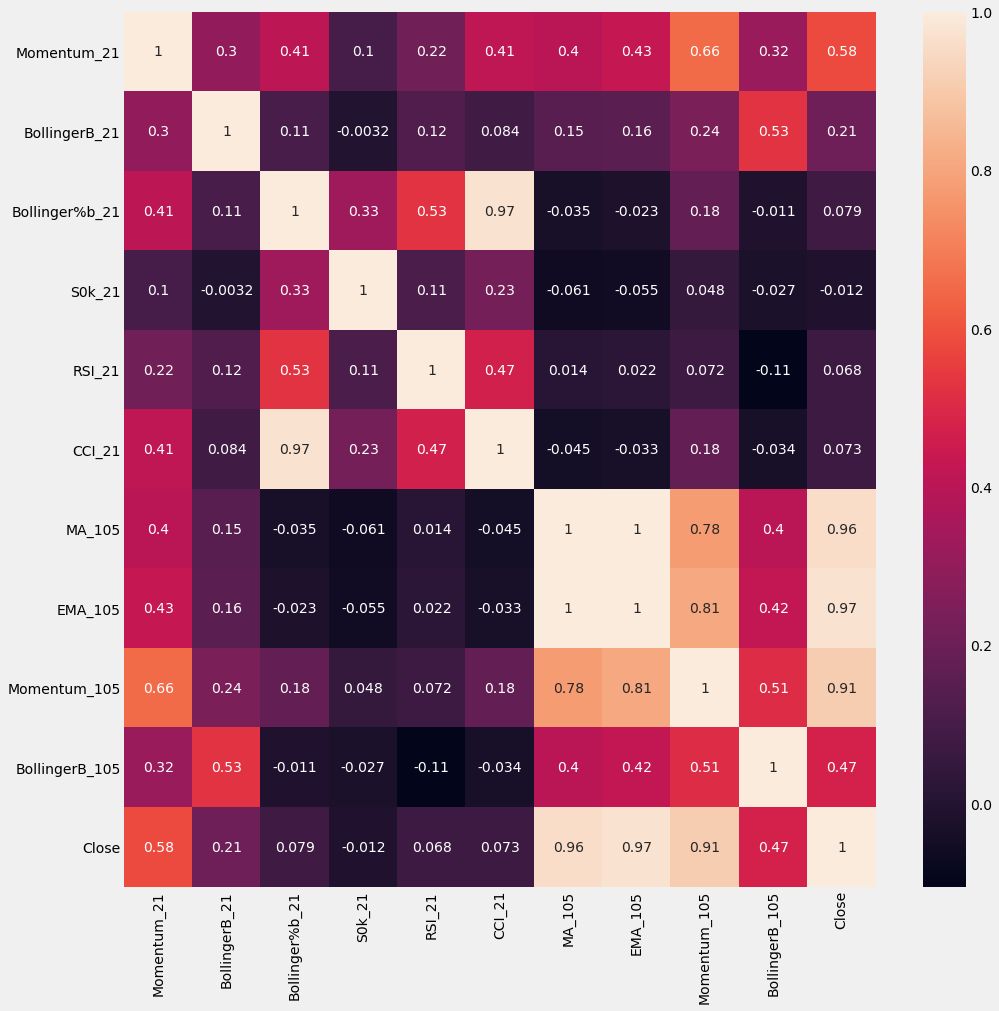

In [ ]:
corrMatrix = primeras80.corr()
plt.figure(figsize=(15,15))
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [ ]:
primeras80 = primeras80.drop(['BollingerB_21','Bollinger%b_21','S0k_21','RSI_21','CCI_21'], axis=1)

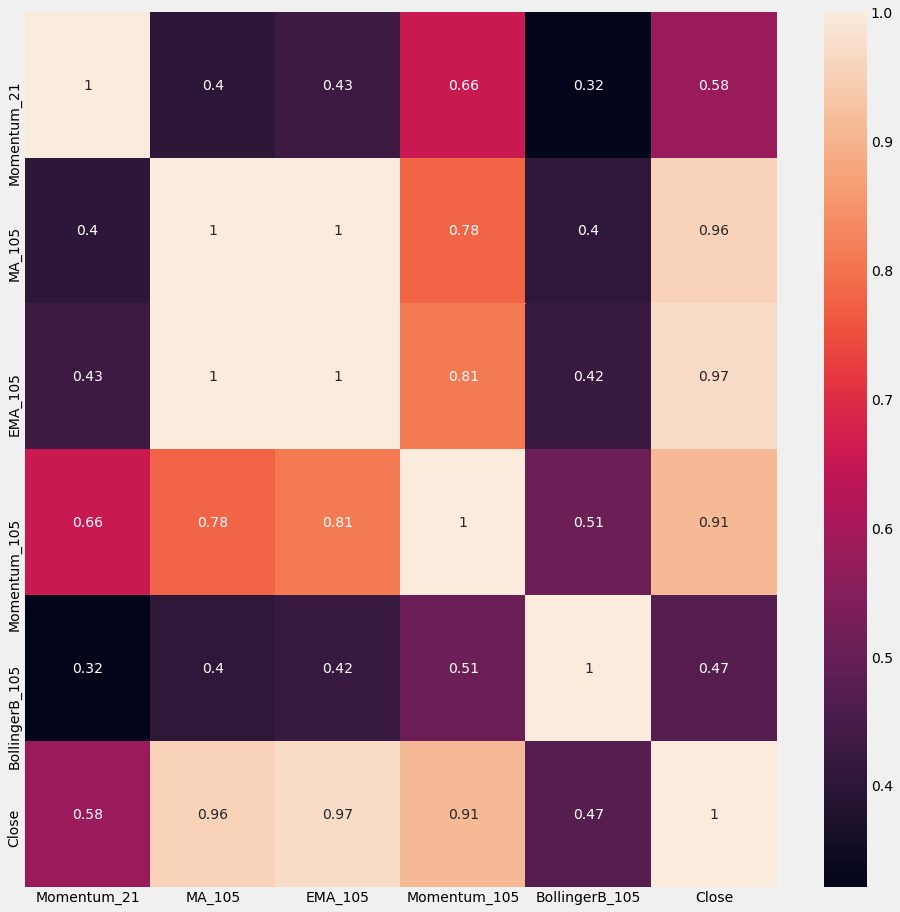

In [ ]:
corrMatrix = primeras80.corr()
plt.figure(figsize=(15,15))
sn.heatmap(corrMatrix, annot=True)
plt.show()

## 80:90

In [ ]:
primeras90 = df2.iloc[:, 80:90]

In [ ]:
primeras90['Close'] = df2.iloc[:,0]

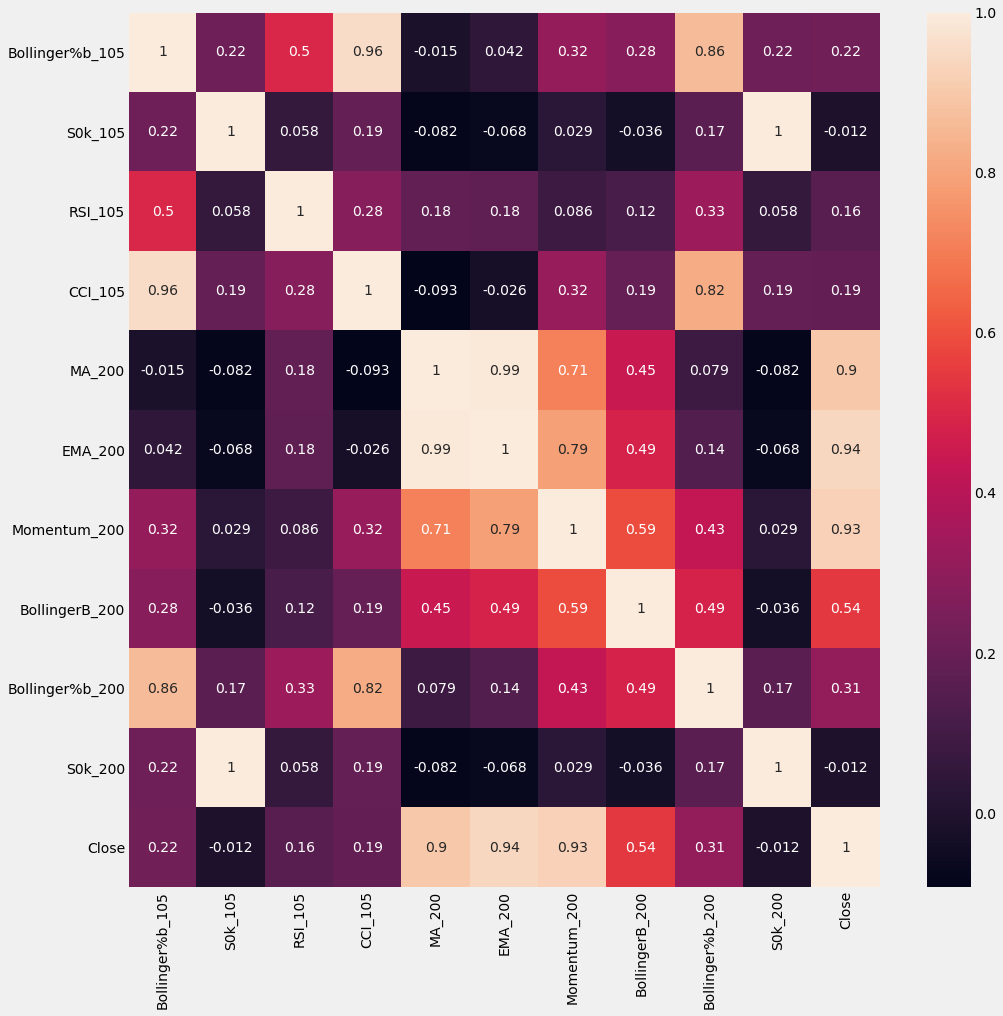

In [ ]:
corrMatrix = primeras90.corr()
plt.figure(figsize=(15,15))
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [ ]:
primeras90 = primeras90.drop(['Bollinger%b_105','S0k_105','RSI_105','CCI_105','Bollinger%b_200','S0k_200'], axis=1)

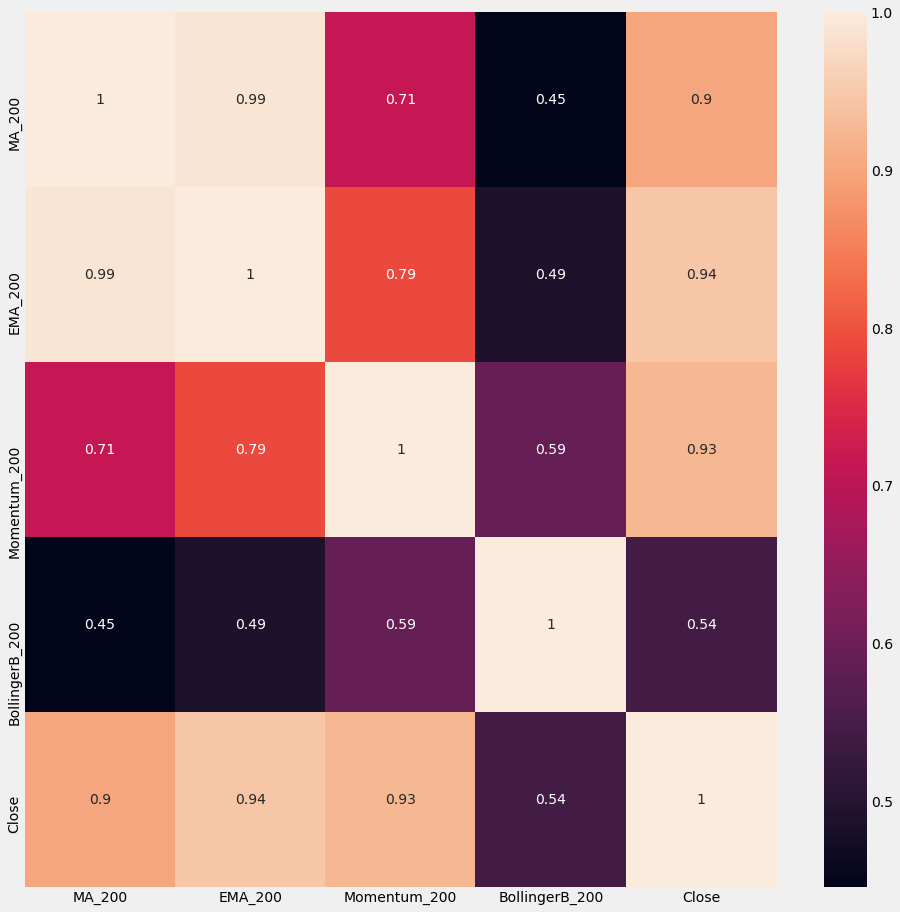

In [ ]:
corrMatrix = primeras90.corr()
plt.figure(figsize=(15,15))
sn.heatmap(corrMatrix, annot=True)
plt.show()

## 90:100

In [ ]:
primeras100 = df2.iloc[:, 90:100]

In [ ]:
primeras100['Close'] = df2.iloc[:,0]

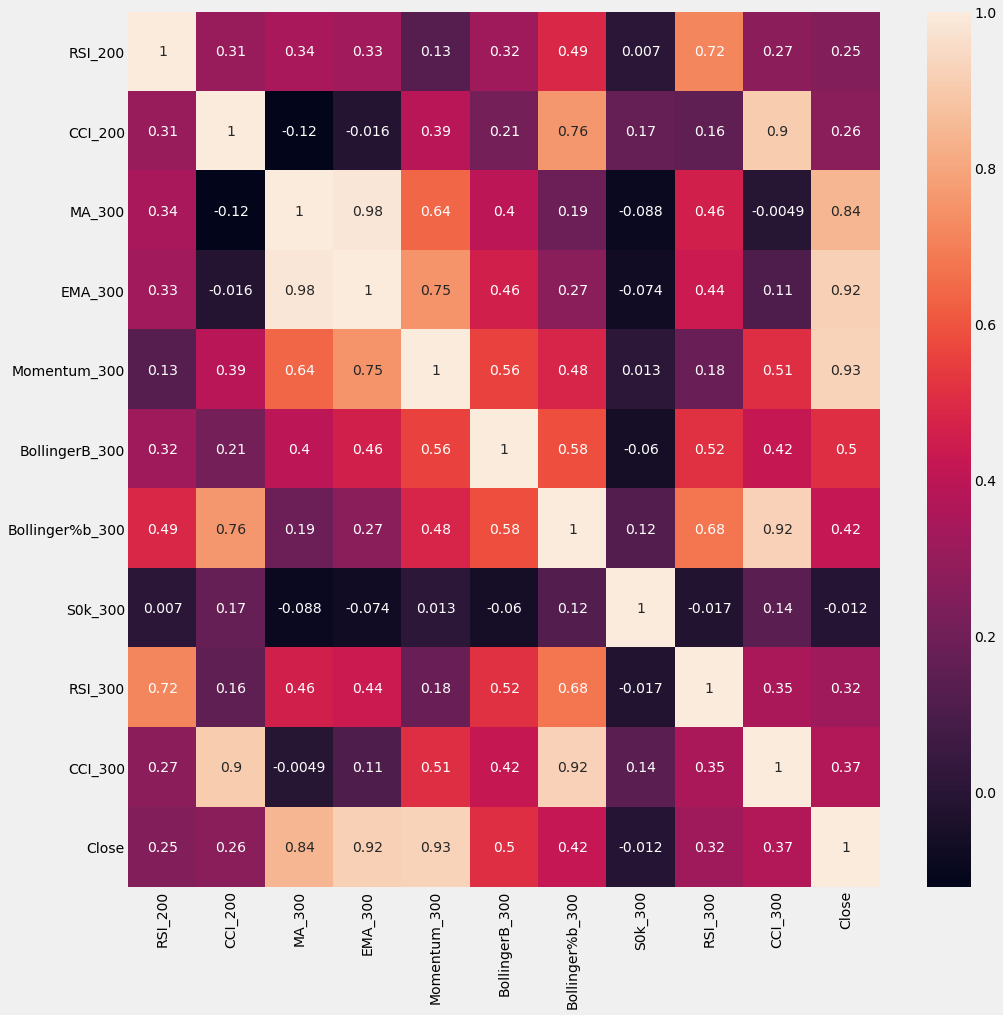

In [ ]:
corrMatrix = primeras100.corr()
plt.figure(figsize=(15,15))
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [ ]:
primeras100 = primeras100.drop(['RSI_200','CCI_200','Bollinger%b_300','S0k_300','RSI_300','CCI_300'], axis=1)

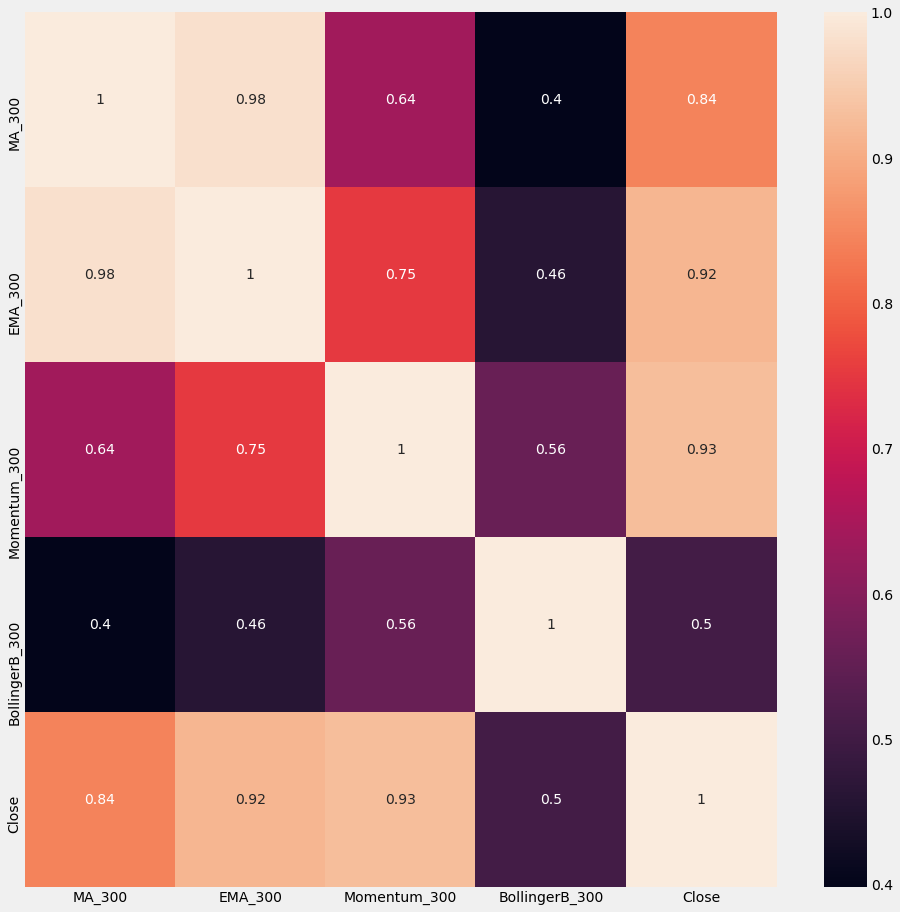

In [ ]:
corrMatrix = primeras100.corr()
plt.figure(figsize=(15,15))
sn.heatmap(corrMatrix, annot=True)
plt.show()

## 100:110

In [ ]:
primeras110 = df2.iloc[:, 100:110]

In [ ]:
primeras110['Close'] = df2.iloc[:,0]

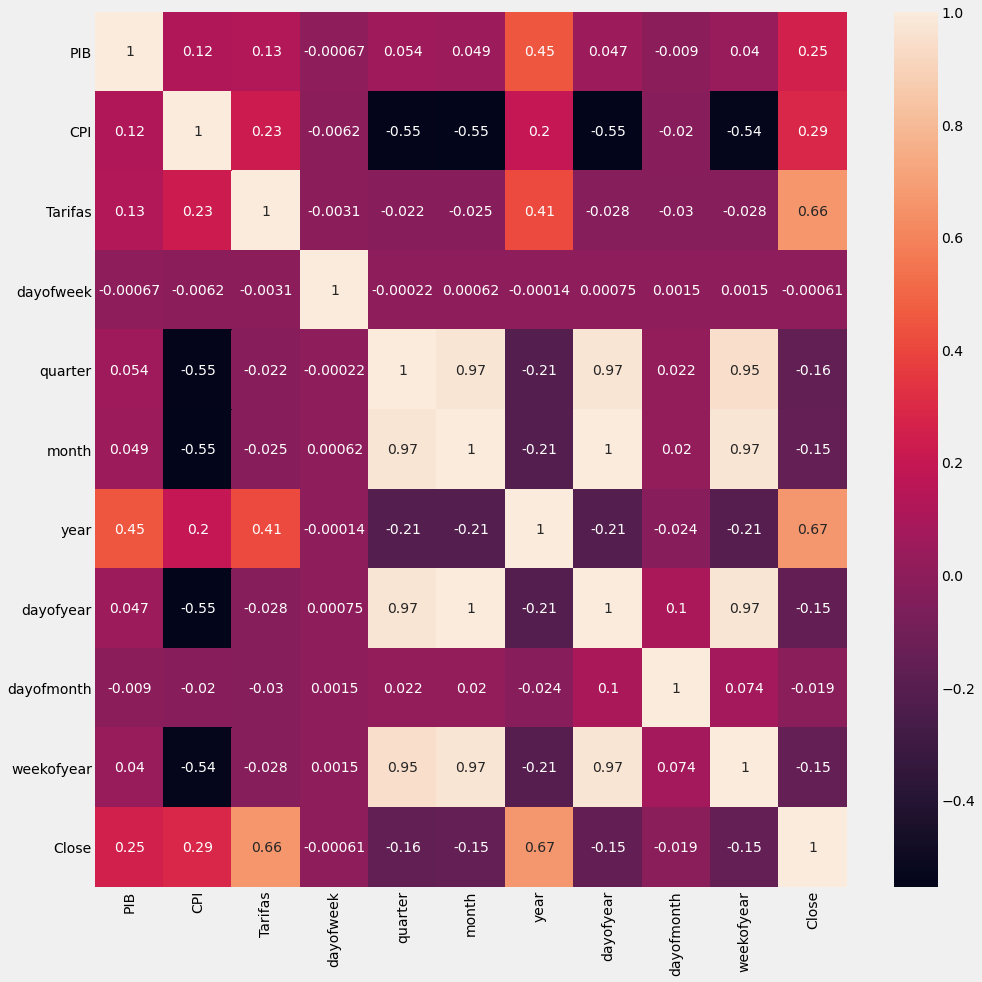

In [ ]:
corrMatrix = primeras110.corr()
plt.figure(figsize=(15,15))
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [ ]:
df2 = df2.drop(['Open SP500','Open Gold','Open SP500'], axis=1)

In [ ]:
#df2 = df2.drop(['Volume','Open Gold','Open SP500','Open Gold','Open SP500'], axis=1)

In [ ]:
df2 = df2.drop(['tipoint','Momentum_2','BollingerB_2','Bollinger%b_2','S0k_2','RSI_2','CCI_2'], axis=1)

In [ ]:
df2 = df2.drop(['Momentum_3','BollingerB_3','S0k_3','RSI_3','CCI_3','Bollinger%b_3'], axis=1)

In [ ]:
df2 = df2.drop(['Momentum_5','BollingerB_5','Bollinger%b_5','S0k_5','RSI_5','CCI_5','Momentum_8','BollingerB_8'], axis=1)

In [ ]:
df2 = df2.drop(['RSI_9','CCI_9','Momentum_10','BollingerB_10','Bollinger%b_10','S0k_10','RSI_10','CCI_10'], axis=1)

In [ ]:
df2 = df2.drop(['Bollinger%b_8','S0k_8','RSI_8','CCI_8','Momentum_9','BollingerB_9','S0k_9','Bollinger%b_9'], axis=1)

In [ ]:
df2 = df2.drop(['BollingerB_15','Bollinger%b_15','S0k_15','RSI_15','CCI_15'], axis=1)

In [ ]:
df2 = df2.drop(['BollingerB_21','Bollinger%b_21','S0k_21','RSI_21','CCI_21'], axis=1)

In [ ]:
df2 = df2.drop(['Bollinger%b_105','S0k_105','RSI_105','CCI_105','Bollinger%b_200','S0k_200'], axis=1)

In [ ]:
df2 = df2.drop(['RSI_200','CCI_200','Bollinger%b_300','S0k_300','RSI_300','CCI_300'], axis=1)

In [ ]:
df3 = df2.iloc[:, 1:48]

In [ ]:
df3

,Volume,NumberTransactions,Close SP500,halving,Close Gold,OpenDJ,CloseDJ,Close_eth,MA_2,EMA_2,MA_3,EMA_3,MA_5,EMA_5,MA_8,EMA_8,MA_9,EMA_9,MA_10,EMA_10,MA_15,EMA_15,Momentum_15,MA_21,EMA_21,Momentum_21,MA_105,EMA_105,Momentum_105,BollingerB_105,MA_200,EMA_200,Momentum_200,BollingerB_200,MA_300,EMA_300,Momentum_300,BollingerB_300,PIB,CPI,Tarifas,dayofweek,quarter,month,year,dayofyear,dayofmonth
0,3021.120000,104550,0.00,0,0.0,0.00,0.00,0.00,0.000,0.000000,0.000000,0.000000,0.000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.00000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,54420.0,-0.044968,0.044267,6,4,10,2015,284,11
1,9493.890000,134410,2052.23,1,1130.3,17493.17,17574.75,0.63,0.000,0.000000,0.000000,0.000000,0.000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.00000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,54420.0,-0.044968,0.044267,0,4,10,2015,285,12
2,12875.400000,134878,2003.69,1,1231.7,17113.55,17081.89,0.60,248.550,248.075000,0.000000,0.000000,0.000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.00000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,54420.0,-0.044968,0.044267,1,4,10,2015,286,13
3,30115.770000,141985,1994.24,1,1243.6,17079.08,16924.75,0.50,248.800,249.407692,249.033333,249.242857,0.000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.00000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,54420.0,-0.044968,0.044267,2,4,10,2015,287,14
4,50535.450000,153495,2023.86,1,1251.4,16944.86,17141.75,0.56,251.500,251.832500,250.200000,251.246667,0.000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.00000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,54420.0,-0.044968,0.044267,3,4,10,2015,288,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014,91764.139884,2639940,4185.47,3,1779.0,34058.16,34200.67,2422.67,63059.755,63022.286415,63231.503333,62721.197245,61911.388,62026.351050,60693.26625,61170.662048,60166.620000,60938.143321,59949.073,60725.874597,59436.341333,59869.276825,4419.43,58728.003333,59061.928660,11866.20,47268.633238,47516.836950,34236.35,0.859634,32724.87720,37680.920159,52385.73,2.116348,25307.566700,31286.566728,53849.75,2.784073,56812.0,0.547438,17.536664,4,2,4,2021,106,16
2015,58912.256128,2268816,4185.47,3,1779.0,34058.16,34200.67,2317.60,62247.390,61897.295472,62484.770000,62027.998623,62177.862,61795.834033,61100.42625,61207.137148,60764.547778,61017.474657,60283.438,60836.588306,59610.632000,60052.467222,2614.36,59028.441905,59268.553328,6309.21,47573.424762,47777.553234,32003.11,0.848792,32978.07060,37916.282148,50638.68,2.105732,25480.819533,31486.223056,51975.85,2.780519,56812.0,0.547438,18.691269,5,2,4,2021,107,17
2016,124882.131824,3444089,4185.47,3,1779.0,34058.16,34200.67,2235.64,60670.730,60636.871824,61500.480000,61017.329311,62207.194,61199.442689,61333.44125,60940.364449,60978.896667,60815.311725,60688.759,60685.692251,59681.075333,60046.741319,1056.65,59227.942857,59335.653934,4189.52,47838.456476,48008.291098,27828.33,0.840506,33223.90150,38136.086903,49166.18,2.094127,25649.859433,31675.727896,50711.97,2.775728,56812.0,0.547438,18.691269,6,2,4,2021,108,18
2017,78229.042267,2390527,4162.80,3,1769.4,34182.38,34077.63,2161.12,58078.335,57645.630608,59163.823333,58583.669656,60722.196,59516.298459,60881.05125,59875.841238,60757.504444,59882.251380,60496.008,59861.022751,59620.946667,59559.649904,-901.93,59245.675238,59046.049940,372.38,48058.932286

In [ ]:
df3.shape

(2019, 47)

In [ ]:
# Visualizar la relación entre variables usando parcelas
plt.figure(figsize = (15, 15))

fig = px.scatter_matrix(df3,dimensions = df3.columns[:8], color = 'weekofyear')

fig.update_layout(
    title = 'Sales Data',
    width = 1100,
    height = 1100,
)

#fig.write_html("correlations.png")
fig.show()
# Los colores segmentan los meses para poder ubicarlos en las graficas en las que no es tan evidente a que mes pertenecen


ValueError: ignored

<Figure size 1080x1080 with 0 Axes>

In [ ]:
df2.shape

In [ ]:
list(df2)

In [ ]:
dfg= pd.DataFrame()
dfg['EMA_5'] = df2['EMA_5']
dfg['Momentum_300'] = df2['Momentum_300']
dfg['dayofweek'] = df2['dayofweek']
dfg['quarter'] = df2['quarter']
dfg['month'] = df2['month']
dfg['year'] = df2['year']
dfg['dayofyear'] = df2['dayofyear']
dfg['weekofyear'] = df2['weekofyear']

In [ ]:
dfg = dfg.drop(['year','dayofyear','weekofyear'], axis=1)

In [ ]:
dfg = dfg.drop(['quarter','month'], axis=1)

In [ ]:
dfg

# XGBoost

In [ ]:
scaler = MinMaxScaler()
scaled = scaler.fit_transform(dfg)

In [ ]:
scaled = pd.DataFrame(scaled)
scaled = scaled.rename(columns={0:'EMA_5',
                                   1:'Momentum_300',
                                  2:'dayofweek'})
scaled

In [ ]:
X_train = scaled[:1959]
y_train = df2.Close[:1959]
X_test = scaled[1959:]
y_test = df2.Close[1959:]

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
from xgboost import plot_importance, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error
plt.style.use('fivethirtyeight')

In [ ]:
reg = xgb.XGBRegressor(n_estimators=1000)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        early_stopping_rounds=50,
       verbose=False)

In [ ]:
plot_importance(reg, height=0.9)

In [ ]:
validacion = reg.predict(X_test)

In [ ]:
validacion_p = pd.DataFrame(validacion, columns={'validacion'})

In [ ]:
validacion_p

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, validacion_p)
mse

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, validacion_p)

In [ ]:
# A parameter grid for XGBoost
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

In [ ]:
params = {
    # Parameters that we are going to tune.
    'max_depth':6,
    'min_child_weight': 1,
    'eta':.3,
    'subsample': 1,
    'colsample_bytree': 1,
    # Other parameters
    'objective':'reg:linear',
}

In [ ]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)
num_boost_round = 1000

In [ ]:
reg2 = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")],
    early_stopping_rounds=10
)

In [ ]:
print("Best MAE: {:.2f} with {} rounds".format(
                 reg2.best_score,
                 reg2.best_iteration+1))

In [ ]:
cv_results = xgb.cv(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    seed=42,
    nfold=3,
    metrics={'mae'},
    early_stopping_rounds=10
)
cv_results

In [ ]:
cv_results['test-mae-mean'].min()

In [ ]:
gridsearch_params = [
    (max_depth, min_child_weight)
    for max_depth in range(9,12)
    for min_child_weight in range(5,8)
]

In [ ]:
# Define initial best params and MAE
min_mae = float("Inf")
best_params = None
for max_depth, min_child_weight in gridsearch_params:
    print("CV with max_depth={}, min_child_weight={}".format(
                             max_depth,
                             min_child_weight))

In [ ]:
# Update our parameters
params['max_depth'] = max_depth
params['min_child_weight'] = min_child_weight

In [ ]:
# Run CV
cv_results = xgb.cv(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    seed=42,
    nfold=5,
    metrics={'mae'},
    early_stopping_rounds=10
)

In [ ]:
# Update best MAE
mean_mae = cv_results['test-mae-mean'].min()
boost_rounds = cv_results['test-mae-mean'].argmin()
print("\tMAE {} for {} rounds".format(mean_mae, boost_rounds))
if mean_mae < min_mae:
    min_mae = mean_mae
    best_params = (max_depth,min_child_weight)

In [ ]:
print("Best params: {}, {}, MAE: {}".format(best_params[0], best_params[1], min_mae))

In [ ]:
params['max_depth'] = 11
params['min_child_weight'] = 7

In [ ]:
gridsearch_params = [
    (subsample, colsample)
    for subsample in [i/10. for i in range(7,11)]
    for colsample in [i/10. for i in range(7,11)]
]

In [ ]:
min_mae = float("Inf")
best_params = None
# We start by the largest values and go down to the smallest
for subsample, colsample in reversed(gridsearch_params):
    print("CV with subsample={}, colsample={}".format(
                             subsample,
                             colsample))
    # We update our parameters
    params['subsample'] = subsample
    params['colsample_bytree'] = colsample
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        metrics={'mae'},
        early_stopping_rounds=10
    )
    # Update best score
    mean_mae = cv_results['test-mae-mean'].min()
    boost_rounds = cv_results['test-mae-mean'].argmin()
    print("\tMAE {} for {} rounds".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = (subsample,colsample)
print("Best params: {}, {}, MAE: {}".format(best_params[0], best_params[1], min_mae))

In [ ]:
params['subsample'] = 0.9
params['colsample_bytree'] = 1.0

In [ ]:
# This can take some time…
min_mae = float("Inf")
best_params = None
for eta in [.3, .2, .1, .05, .01, .005]:
    print("CV with eta={}".format(eta))
    # We update our parameters
    params['eta'] = eta
    # Run and time CV
    cv_results = xgb.cv(params,dtrain,num_boost_round=num_boost_round,seed=42,nfold=5,metrics={'mae'},early_stopping_rounds=10)
    # Update best score
    mean_mae = cv_results['test-mae-mean'].min()
    boost_rounds = cv_results['test-mae-mean'].argmin()
    print("\tMAE {} for {} rounds\n".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = eta
print("Best params: {}, MAE: {}".format(best_params, min_mae))

In [ ]:
params['eta'] = 0.01

In [ ]:
params['eval_metric'] = 'mae'

In [ ]:
params

In [ ]:
best_model_Users = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")],
    early_stopping_rounds=140
)

In [ ]:
dtrain2 = xgb.DMatrix(X_test)

In [ ]:
validacion = best_model_Users.predict(dtrain2)

In [ ]:
validacion_p = pd.DataFrame(validacion, columns={'validacion'})

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, validacion_p)
mse

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, validacion_p)

In [ ]:
y_pru = y_test

In [ ]:
y_pru = y_pru.reset_index()

In [ ]:
y_pru

In [ ]:
plt.figure(figsize=(16,8))
#plt.plot(todo1, label='modelo1')

plt.plot(y_pru['Close'], label='y')
plt.plot(validacion_p, label='yhat', alpha=0.7)
#plt.plot(todo1, label='modelo1')
#plt.plot(todo2, label='modelo2')

plt.legend(loc='best')
plt.show()

In [ ]:
dtrain2 = xgb.DMatrix(scaled)

In [ ]:
validacion = best_model_Users.predict(dtrain2)

In [ ]:
validacion_p = pd.DataFrame(validacion, columns={'validacion'})
validacion_p

In [ ]:
plt.figure(figsize=(16,8))
#plt.plot(todo1, label='modelo1')

plt.plot(df2['Close'], label='y')
plt.plot(validacion_p, label='validacion', alpha=0.7)
#plt.plot(todo1, label='modelo1')
#plt.plot(todo2, label='modelo2')

plt.legend(loc='best')
plt.show()

In [ ]:
!pip install shap

In [ ]:
!pip install eli5

In [ ]:
!pip install lime

In [ ]:
from collections import Counter
import shap
import eli5
import lime
from lime.lime_tabular import LimeTabularExplainer
shap.initjs()

In [ ]:
!pip install s3fs

In [ ]:
import time
from scipy import stats
import datetime
import s3fs
import statistics
import decimal
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display

import pandas as pd, numpy as np, os, random, math, matplotlib, pylab, scipy, gc

from sklearn.model_selection import train_test_split
import xgboost as xgb
from xgboost import XGBRegressor

random.seed(1)
np.random.seed(1)
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# use labeled data set
shap_explainer = shap.TreeExplainer(best_model_Users)
test_shap_values = shap_explainer.shap_values(X_test)
print('Expected Value:', shap_explainer.expected_value)
pd.DataFrame(test_shap_values).head()

In [ ]:
shap.summary_plot(test_shap_values, X_test, plot_type="bar", max_display=30)

In [ ]:
# shows feature contribution
shap.summary_plot(test_shap_values, X_test, max_display=30)

#Hasta aqui

In [ ]:
2019*0.7


In [ ]:
2019*0.15

In [ ]:
1413+303

In [ ]:
df2

df2.shape()

# XGBoost

In [ ]:
df2

In [ ]:
X = df2.iloc[:, 1:48]
y = df2.iloc[:, [0]]

In [ ]:
scaler = MinMaxScaler()
scaled = scaler.fit_transform(X)

In [ ]:
X_train = scaled[:1959]
y_train = y.Close[:1959]
X_test = scaled[1959:]
y_test = y.Close[1959:]

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
from xgboost import plot_importance, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error
plt.style.use('fivethirtyeight')

In [ ]:
reg = xgb.XGBRegressor(n_estimators=1000)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        early_stopping_rounds=50,
       verbose=False)

In [ ]:
plot_importance(reg, height=0.9)

In [ ]:
validacion = reg.predict(X_test)

In [ ]:
validacion_p = pd.DataFrame(validacion, columns={'validacion'})

In [ ]:
validacion_p

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, validacion_p)
mse

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, validacion_p)

In [ ]:
# A parameter grid for XGBoost
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

In [ ]:
params = {
    # Parameters that we are going to tune.
    'max_depth':6,
    'min_child_weight': 1,
    'eta':.3,
    'subsample': 1,
    'colsample_bytree': 1,
    # Other parameters
    'objective':'reg:linear',
}

In [ ]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)
num_boost_round = 1000

In [ ]:
reg2 = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")],
    early_stopping_rounds=10
)

In [ ]:
print("Best MAE: {:.2f} with {} rounds".format(
                 reg2.best_score,
                 reg2.best_iteration+1))

In [ ]:
cv_results = xgb.cv(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    seed=42,
    nfold=3,
    metrics={'mae'},
    early_stopping_rounds=10
)
cv_results

In [ ]:
cv_results['test-mae-mean'].min()

In [ ]:
gridsearch_params = [
    (max_depth, min_child_weight)
    for max_depth in range(9,12)
    for min_child_weight in range(5,8)
]

In [ ]:
# Define initial best params and MAE
min_mae = float("Inf")
best_params = None
for max_depth, min_child_weight in gridsearch_params:
    print("CV with max_depth={}, min_child_weight={}".format(
                             max_depth,
                             min_child_weight))

In [ ]:
# Update our parameters
params['max_depth'] = max_depth
params['min_child_weight'] = min_child_weight

In [ ]:
# Run CV
cv_results = xgb.cv(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    seed=42,
    nfold=5,
    metrics={'mae'},
    early_stopping_rounds=10
)

In [ ]:
# Update best MAE
mean_mae = cv_results['test-mae-mean'].min()
boost_rounds = cv_results['test-mae-mean'].argmin()
print("\tMAE {} for {} rounds".format(mean_mae, boost_rounds))
if mean_mae < min_mae:
    min_mae = mean_mae
    best_params = (max_depth,min_child_weight)

In [ ]:
print("Best params: {}, {}, MAE: {}".format(best_params[0], best_params[1], min_mae))

In [ ]:
params['max_depth'] = 11
params['min_child_weight'] = 7

In [ ]:
gridsearch_params = [
    (subsample, colsample)
    for subsample in [i/10. for i in range(7,11)]
    for colsample in [i/10. for i in range(7,11)]
]

In [ ]:
min_mae = float("Inf")
best_params = None
# We start by the largest values and go down to the smallest
for subsample, colsample in reversed(gridsearch_params):
    print("CV with subsample={}, colsample={}".format(
                             subsample,
                             colsample))
    # We update our parameters
    params['subsample'] = subsample
    params['colsample_bytree'] = colsample
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        metrics={'mae'},
        early_stopping_rounds=10
    )
    # Update best score
    mean_mae = cv_results['test-mae-mean'].min()
    boost_rounds = cv_results['test-mae-mean'].argmin()
    print("\tMAE {} for {} rounds".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = (subsample,colsample)
print("Best params: {}, {}, MAE: {}".format(best_params[0], best_params[1], min_mae))

In [ ]:
params['subsample'] = 1.0
params['colsample_bytree'] = 0.9

In [ ]:
# This can take some time…
min_mae = float("Inf")
best_params = None
for eta in [.3, .2, .1, .05, .01, .005]:
    print("CV with eta={}".format(eta))
    # We update our parameters
    params['eta'] = eta
    # Run and time CV
    cv_results = xgb.cv(params,dtrain,num_boost_round=num_boost_round,seed=42,nfold=5,metrics={'mae'},early_stopping_rounds=10)
    # Update best score
    mean_mae = cv_results['test-mae-mean'].min()
    boost_rounds = cv_results['test-mae-mean'].argmin()
    print("\tMAE {} for {} rounds\n".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = eta
print("Best params: {}, MAE: {}".format(best_params, min_mae))

In [ ]:
params['eta'] = 0.01

In [ ]:
params['eval_metric'] = 'mae'

In [ ]:
params

In [ ]:
best_model_Users = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")],
    early_stopping_rounds=140
)

In [ ]:
dtrain2 = xgb.DMatrix(X_test)

In [ ]:
validacion = best_model_Users.predict(dtrain2)

In [ ]:
validacion_p = pd.DataFrame(validacion, columns={'validacion'})

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, validacion_p)
mse

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, validacion_p)

In [ ]:
y_pru = y_test

In [ ]:
y_pru = y_pru.reset_index()

In [ ]:
y_pru

In [ ]:
plt.figure(figsize=(16,8))
#plt.plot(todo1, label='modelo1')

plt.plot(y_pru['Close'], label='y')
plt.plot(validacion_p, label='yhat', alpha=0.7)
#plt.plot(todo1, label='modelo1')
#plt.plot(todo2, label='modelo2')

plt.legend(loc='best')
plt.show()

In [ ]:
dtrain2 = xgb.DMatrix(scaled)

In [ ]:
validacion = best_model_Users.predict(dtrain2)

In [ ]:
validacion_p = pd.DataFrame(validacion, columns={'validacion'})
validacion_p

In [ ]:
plt.figure(figsize=(16,8))
#plt.plot(todo1, label='modelo1')

plt.plot(df2['Close'], label='y')
plt.plot(validacion_p, label='validacion', alpha=0.7)
#plt.plot(todo1, label='modelo1')
#plt.plot(todo2, label='modelo2')

plt.legend(loc='best')
plt.show()

In [ ]:
# use labeled data set
shap_explainer = shap.TreeExplainer(best_model_Users)
test_shap_values = shap_explainer.shap_values(X_test)
print('Expected Value:', shap_explainer.expected_value)
pd.DataFrame(test_shap_values).head()

In [ ]:
from xgboost import plot_importance
best_model_Users.feature_names_ = df2.columns.values[1:48]
fig, ax = plt.subplots(1,1,figsize=(15,15))
plot_importance(best_model_Users, ax=ax)
plt.savefig("xgboost_feature_importance.png")

In [ ]:
shap.summary_plot(test_shap_values, X_test, plot_type="bar", max_display=48, show=False)
plt.savefig("shap_feature_importance.png")

In [ ]:
# shows feature contribution
shap.summary_plot(test_shap_values, X_test, max_display=48, feature_names=df2.columns.values[1:48])

In [ ]:
X

# XGBoost

In [ ]:
df2

In [ ]:
X = df2.iloc[:, [11,10,8,26,18,1,2]]
y = df2.iloc[:, [0]]

In [ ]:
X

In [ ]:
scaler = MinMaxScaler()
scaled = scaler.fit_transform(X)

In [ ]:
X_train = scaled[:1959]
y_train = y.Close[:1959]
X_test = scaled[1959:]
y_test = y.Close[1959:]

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
from xgboost import plot_importance, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error
plt.style.use('fivethirtyeight')

In [ ]:
reg = xgb.XGBRegressor(n_estimators=1000)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        early_stopping_rounds=50,
       verbose=False)

In [ ]:
plot_importance(reg, height=0.9)

In [ ]:
validacion = reg.predict(X_test)

In [ ]:
validacion_p = pd.DataFrame(validacion, columns={'validacion'})

In [ ]:
validacion_p

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, validacion_p)
mse

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, validacion_p)

In [ ]:
# A parameter grid for XGBoost
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

In [ ]:
params = {
    # Parameters that we are going to tune.
    'max_depth':6,
    'min_child_weight': 1,
    'eta':.3,
    'subsample': 1,
    'colsample_bytree': 1,
    # Other parameters
    'objective':'reg:linear',
}

In [ ]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)
num_boost_round = 1000

In [ ]:
reg2 = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")],
    early_stopping_rounds=10
)

In [ ]:
print("Best MAE: {:.2f} with {} rounds".format(
                 reg2.best_score,
                 reg2.best_iteration+1))

In [ ]:
cv_results = xgb.cv(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    seed=42,
    nfold=3,
    metrics={'mae'},
    early_stopping_rounds=10
)
cv_results

In [ ]:
cv_results['test-mae-mean'].min()

In [ ]:
gridsearch_params = [
    (max_depth, min_child_weight)
    for max_depth in range(9,12)
    for min_child_weight in range(5,8)
]

In [ ]:
# Define initial best params and MAE
min_mae = float("Inf")
best_params = None
for max_depth, min_child_weight in gridsearch_params:
    print("CV with max_depth={}, min_child_weight={}".format(
                             max_depth,
                             min_child_weight))

In [ ]:
# Update our parameters
params['max_depth'] = max_depth
params['min_child_weight'] = min_child_weight

In [ ]:
# Run CV
cv_results = xgb.cv(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    seed=42,
    nfold=5,
    metrics={'mae'},
    early_stopping_rounds=10
)

In [ ]:
# Update best MAE
mean_mae = cv_results['test-mae-mean'].min()
boost_rounds = cv_results['test-mae-mean'].argmin()
print("\tMAE {} for {} rounds".format(mean_mae, boost_rounds))
if mean_mae < min_mae:
    min_mae = mean_mae
    best_params = (max_depth,min_child_weight)

In [ ]:
print("Best params: {}, {}, MAE: {}".format(best_params[0], best_params[1], min_mae))

In [ ]:
params['max_depth'] = 11
params['min_child_weight'] = 7

In [ ]:
gridsearch_params = [
    (subsample, colsample)
    for subsample in [i/10. for i in range(7,11)]
    for colsample in [i/10. for i in range(7,11)]
]

In [ ]:
min_mae = float("Inf")
best_params = None
# We start by the largest values and go down to the smallest
for subsample, colsample in reversed(gridsearch_params):
    print("CV with subsample={}, colsample={}".format(
                             subsample,
                             colsample))
    # We update our parameters
    params['subsample'] = subsample
    params['colsample_bytree'] = colsample
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        metrics={'mae'},
        early_stopping_rounds=10
    )
    # Update best score
    mean_mae = cv_results['test-mae-mean'].min()
    boost_rounds = cv_results['test-mae-mean'].argmin()
    print("\tMAE {} for {} rounds".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = (subsample,colsample)
print("Best params: {}, {}, MAE: {}".format(best_params[0], best_params[1], min_mae))

In [ ]:
params['subsample'] = 0.8
params['colsample_bytree'] = 0.8

In [ ]:
# This can take some time…
min_mae = float("Inf")
best_params = None
for eta in [.3, .2, .1, .05, .01, .005]:
    print("CV with eta={}".format(eta))
    # We update our parameters
    params['eta'] = eta
    # Run and time CV
    cv_results = xgb.cv(params,dtrain,num_boost_round=num_boost_round,seed=42,nfold=5,metrics={'mae'},early_stopping_rounds=10)
    # Update best score
    mean_mae = cv_results['test-mae-mean'].min()
    boost_rounds = cv_results['test-mae-mean'].argmin()
    print("\tMAE {} for {} rounds\n".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = eta
print("Best params: {}, MAE: {}".format(best_params, min_mae))

In [ ]:
params['eta'] = 0.05

In [ ]:
params['eval_metric'] = 'mae'

In [ ]:
params

In [ ]:
best_model_Users = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")],
    early_stopping_rounds=140
)

In [ ]:
dtrain2 = xgb.DMatrix(X_test)

In [ ]:
validacion = best_model_Users.predict(dtrain2)

In [ ]:
validacion_p = pd.DataFrame(validacion, columns={'validacion'})

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, validacion_p)
mse

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, validacion_p)

In [ ]:
y_pru = y_test

In [ ]:
y_pru = y_pru.reset_index()

In [ ]:
y_pru

In [ ]:
plt.figure(figsize=(16,8))
#plt.plot(todo1, label='modelo1')

plt.plot(y_pru['Close'], label='y')
plt.plot(validacion_p, label='yhat', alpha=0.7)
#plt.plot(todo1, label='modelo1')
#plt.plot(todo2, label='modelo2')

plt.legend(loc='best')
plt.show()

In [ ]:
dtrain2 = xgb.DMatrix(scaled)

In [ ]:
validacion = best_model_Users.predict(dtrain2)

In [ ]:
validacion_p = pd.DataFrame(validacion, columns={'validacion'})
validacion_p

In [ ]:
plt.figure(figsize=(16,8))
#plt.plot(todo1, label='modelo1')

plt.plot(df2['Close'], label='y')
plt.plot(validacion_p, label='validacion', alpha=0.7)
#plt.plot(todo1, label='modelo1')
#plt.plot(todo2, label='modelo2')

plt.legend(loc='best')
plt.show()

In [ ]:
# use labeled data set
shap_explainer = shap.TreeExplainer(best_model_Users)
test_shap_values = shap_explainer.shap_values(X_test)
print('Expected Value:', shap_explainer.expected_value)
pd.DataFrame(test_shap_values).head()

In [ ]:
df2.columns.values[[8,1,10,26]]

In [ ]:
from xgboost import plot_importance
best_model_Users.feature_names_ = df2.columns.values[1:48]
fig, ax = plt.subplots(1,1,figsize=(15,15))
plot_importance(best_model_Users, ax=ax)
plt.savefig("xgboost_feature_importance.png")

In [ ]:
shap.summary_plot(test_shap_values, X_test, plot_type="bar", max_display=48, show=False)
plt.savefig("shap_feature_importance.png")

In [ ]:
# shows feature contribution
shap.summary_plot(test_shap_values, X_test, max_display=48, feature_names=df2.columns.values[1:48])

In [ ]:
X

In [ ]:
# Visualizar la relación entre variables usando parcelas
plt.figure(figsize = (15, 15))

fig = px.scatter_matrix(X,
    dimensions = X.columns[:8], color = 'EMA_2')

fig.update_layout(
    title = 'Sales Data',
    width = 1100,
    height = 1100,
)
fig.show()

# Los colores segmentan los meses para poder ubicarlos en las graficas en las que no es tan evidente a que mes pertenecen


In [ ]:
list(df2)

# PCA de las medias

In [ ]:
# MA_300
# MA_200
# MA_105
# MA_21
# MA_15
# MA_10
# MA_9
# MA_8
# MA_5
# MA_2

In [ ]:
media = pd.DataFrame()
media['MA_300'] = df2['MA_300']
media['MA_200'] = df2['MA_200']
media['MA_105'] = df2['MA_105']
media['MA_21'] = df2['MA_21']
media['MA_15'] = df2['MA_15']
media['MA_10'] = df2['MA_10']
media['MA_9'] = df2['MA_9']
media['MA_8'] = df2['MA_8']
media['MA_5'] = df2['MA_5']
media['MA_2'] = df2['MA_2']

In [ ]:
pca = PCA(n_components = 3)
principal_comp = pca.fit_transform(media)
principal_comp

In [ ]:
pca_df = pd.DataFrame(data = principal_comp, columns = ['pca1', 'pca2', 'pca3'])
pca_df.head()

In [ ]:
# Visualizar los clústeres con 3D-Scatterplot
fig = px.scatter_3d(pca_df, x = 'pca1', y = 'pca2', z = 'pca3', size_max = 18, opacity = 0.7)
fig.update_layout(margin = dict(l = 0, r = 0, b = 0, t = 0))

# XGBoost

In [ ]:
X = pca_df
y = df2.iloc[:, [0]]

In [ ]:
X

In [ ]:
scaler = MinMaxScaler()
scaled = scaler.fit_transform(X)

In [ ]:
X_train = scaled[:1959]
y_train = y.Close[:1959]
X_test = scaled[1959:]
y_test = y.Close[1959:]

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
from xgboost import plot_importance, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error
plt.style.use('fivethirtyeight')

In [ ]:
reg = xgb.XGBRegressor(n_estimators=1000)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        early_stopping_rounds=50,
       verbose=False)

In [ ]:
plot_importance(reg, height=0.9)

In [ ]:
validacion = reg.predict(X_test)

In [ ]:
validacion_p = pd.DataFrame(validacion, columns={'validacion'})

In [ ]:
validacion_p

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, validacion_p)
mse

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, validacion_p)

In [ ]:
# A parameter grid for XGBoost
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

In [ ]:
params = {
    # Parameters that we are going to tune.
    'max_depth':6,
    'min_child_weight': 1,
    'eta':.3,
    'subsample': 1,
    'colsample_bytree': 1,
    # Other parameters
    'objective':'reg:linear',
}

In [ ]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)
num_boost_round = 1000

In [ ]:
reg2 = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")],
    early_stopping_rounds=10
)

In [ ]:
print("Best MAE: {:.2f} with {} rounds".format(
                 reg2.best_score,
                 reg2.best_iteration+1))

In [ ]:
cv_results = xgb.cv(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    seed=42,
    nfold=3,
    metrics={'mae'},
    early_stopping_rounds=10
)
cv_results

In [ ]:
cv_results['test-mae-mean'].min()

In [ ]:
gridsearch_params = [
    (max_depth, min_child_weight)
    for max_depth in range(9,12)
    for min_child_weight in range(5,8)
]

In [ ]:
# Define initial best params and MAE
min_mae = float("Inf")
best_params = None
for max_depth, min_child_weight in gridsearch_params:
    print("CV with max_depth={}, min_child_weight={}".format(
                             max_depth,
                             min_child_weight))

In [ ]:
# Update our parameters
params['max_depth'] = max_depth
params['min_child_weight'] = min_child_weight

In [ ]:
# Run CV
cv_results = xgb.cv(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    seed=42,
    nfold=5,
    metrics={'mae'},
    early_stopping_rounds=10
)

In [ ]:
# Update best MAE
mean_mae = cv_results['test-mae-mean'].min()
boost_rounds = cv_results['test-mae-mean'].argmin()
print("\tMAE {} for {} rounds".format(mean_mae, boost_rounds))
if mean_mae < min_mae:
    min_mae = mean_mae
    best_params = (max_depth,min_child_weight)

In [ ]:
print("Best params: {}, {}, MAE: {}".format(best_params[0], best_params[1], min_mae))

In [ ]:
params['max_depth'] = 11
params['min_child_weight'] = 7

In [ ]:
gridsearch_params = [
    (subsample, colsample)
    for subsample in [i/10. for i in range(7,11)]
    for colsample in [i/10. for i in range(7,11)]
]

In [ ]:
min_mae = float("Inf")
best_params = None
# We start by the largest values and go down to the smallest
for subsample, colsample in reversed(gridsearch_params):
    print("CV with subsample={}, colsample={}".format(
                             subsample,
                             colsample))
    # We update our parameters
    params['subsample'] = subsample
    params['colsample_bytree'] = colsample
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        metrics={'mae'},
        early_stopping_rounds=10
    )
    # Update best score
    mean_mae = cv_results['test-mae-mean'].min()
    boost_rounds = cv_results['test-mae-mean'].argmin()
    print("\tMAE {} for {} rounds".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = (subsample,colsample)
print("Best params: {}, {}, MAE: {}".format(best_params[0], best_params[1], min_mae))

In [ ]:
params['subsample'] = 1.0
params['colsample_bytree'] = 1.0

In [ ]:
# This can take some time…
min_mae = float("Inf")
best_params = None
for eta in [.3, .2, .1, .05, .01, .005]:
    print("CV with eta={}".format(eta))
    # We update our parameters
    params['eta'] = eta
    # Run and time CV
    cv_results = xgb.cv(params,dtrain,num_boost_round=num_boost_round,seed=42,nfold=5,metrics={'mae'},early_stopping_rounds=10)
    # Update best score
    mean_mae = cv_results['test-mae-mean'].min()
    boost_rounds = cv_results['test-mae-mean'].argmin()
    print("\tMAE {} for {} rounds\n".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = eta
print("Best params: {}, MAE: {}".format(best_params, min_mae))

In [ ]:
params['eta'] = 0.1

In [ ]:
params['eval_metric'] = 'mae'

In [ ]:
params

In [ ]:
best_model_Users = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")],
    early_stopping_rounds=140
)

In [ ]:
dtrain2 = xgb.DMatrix(X_test)

In [ ]:
validacion = best_model_Users.predict(dtrain2)

In [ ]:
validacion_p = pd.DataFrame(validacion, columns={'validacion'})

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, validacion_p)
mse

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, validacion_p)

In [ ]:
y_pru = y_test

In [ ]:
y_pru = y_pru.reset_index()

In [ ]:
y_pru

In [ ]:
plt.figure(figsize=(16,8))
#plt.plot(todo1, label='modelo1')

plt.plot(y_pru['Close'], label='y')
plt.plot(validacion_p, label='yhat', alpha=0.7)
#plt.plot(todo1, label='modelo1')
#plt.plot(todo2, label='modelo2')

plt.legend(loc='best')
plt.show()

In [ ]:
dtrain2 = xgb.DMatrix(scaled)

In [ ]:
validacion = best_model_Users.predict(dtrain2)

In [ ]:
validacion_p = pd.DataFrame(validacion, columns={'validacion'})
validacion_p

In [ ]:
plt.figure(figsize=(16,8))
#plt.plot(todo1, label='modelo1')

plt.plot(df2['Close'], label='y')
plt.plot(validacion_p, label='validacion', alpha=0.7)
#plt.plot(todo1, label='modelo1')
#plt.plot(todo2, label='modelo2')

plt.legend(loc='best')
plt.show()

In [ ]:
# use labeled data set
shap_explainer = shap.TreeExplainer(best_model_Users)
test_shap_values = shap_explainer.shap_values(X_test)
print('Expected Value:', shap_explainer.expected_value)
pd.DataFrame(test_shap_values).head()

In [ ]:
from xgboost import plot_importance
best_model_Users.feature_names_ = df2.columns.values[1:48]
fig, ax = plt.subplots(1,1,figsize=(15,15))
plot_importance(best_model_Users, ax=ax)
plt.savefig("xgboost_feature_importance.png")

In [ ]:
shap.summary_plot(test_shap_values, X_test, plot_type="bar", max_display=48, show=False)
plt.savefig("shap_feature_importance.png")

In [ ]:
# shows feature contribution
shap.summary_plot(test_shap_values, X_test, max_display=48)

In [ ]:
X

In [ ]:
# Visualizar la relación entre variables usando parcelas
plt.figure(figsize = (15, 15))

fig = px.scatter_matrix(X,
    dimensions = X.columns[:8], color = 'EMA_2')

fig.update_layout(
    title = 'Sales Data',
    width = 1100,
    height = 1100,
)
fig.show()

# Los colores segmentan los meses para poder ubicarlos en las graficas en las que no es tan evidente a que mes pertenecen


In [ ]:
list(df2)

# PCA de las medias

In [ ]:
# EMA_300
# EMA_200
# EMA_105
# EMA_21
# EMA_15
# EMA_10
# EMA_9
# EMA_8
# EMA_5
# EMA_2

In [ ]:
f_you = pd.DataFrame()
f_you['EMA_300'] = df2['EMA_300']
f_you['EMA_200'] = df2['EMA_200']
f_you['EMA_105'] = df2['EMA_105']
f_you['EMA_21'] = df2['EMA_21']
f_you['EMA_15'] = df2['EMA_15']
f_you['EMA_10'] = df2['EMA_10']
f_you['EMA_9'] = df2['EMA_9']
f_you['EMA_8'] = df2['EMA_8']
f_you['EMA_5'] = df2['EMA_5']
f_you['EMA_2'] = df2['EMA_2']

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

In [ ]:
pca = PCA(n_components = 3)
principal_comp_ema = pca.fit_transform(f_you)
principal_comp_ema

In [ ]:
dataset_pca = f_you

In [ ]:
# Piepleine con Scaler y n_components=10
pipe = Pipeline([('scaler', StandardScaler()),
        		 ('reducer', PCA(n_components=10))])

# Ajuste pipeline a los datos
pipe.fit(dataset_pca)


# Plot the explained variance ratio
plt.plot(pipe.steps[1][1].explained_variance_ratio_)

plt.xlabel('Principal component index')
plt.ylabel('Explained variance ratio')
plt.show()

In [ ]:
# Piepleine con Scaler y n_components=10
pipe = Pipeline([('scaler', StandardScaler()),
        		 ('reducer', PCA(n_components=1))])

# Ajuste pipeline a los datos
pipe.fit(dataset_pca)


# Plot the explained variance ratio
print(pipe.steps[1][1].explained_variance_ratio_.cumsum())

plt.plot(pipe.steps[1][1].explained_variance_ratio_)

plt.xlabel('Principal component index')
plt.ylabel('Explained variance ratio')
plt.show()

In [ ]:
pca_df_ema = pd.DataFrame(data = principal_comp_ema, columns = ['pca1', 'pca2', 'pca3'])
pca_df_ema.head()

In [ ]:
# Visualizar los clústeres con 3D-Scatterplot
fig = px.scatter_3d(pca_df_ema, x = 'pca1', y = 'pca2', z = 'pca3', size_max = 18, opacity = 0.7)
fig.update_layout(margin = dict(l = 0, r = 0, b = 0, t = 0))

# XGBoost

In [ ]:
X = pca_df_ema
y = df2.iloc[:, [0]]

In [ ]:
X

In [ ]:
scaler = MinMaxScaler()
scaled = scaler.fit_transform(X)

In [ ]:
X_train = scaled[:1959]
y_train = y.Close[:1959]
X_test = scaled[1959:]
y_test = y.Close[1959:]

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
from xgboost import plot_importance, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error
plt.style.use('fivethirtyeight')

In [ ]:
reg = xgb.XGBRegressor(n_estimators=1000)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        early_stopping_rounds=50,
       verbose=False)

In [ ]:
plot_importance(reg, height=0.9)

In [ ]:
validacion = reg.predict(X_test)

In [ ]:
validacion_p = pd.DataFrame(validacion, columns={'validacion'})

In [ ]:
validacion_p

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, validacion_p)
mse

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, validacion_p)

In [ ]:
# A parameter grid for XGBoost
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

In [ ]:
params = {
    # Parameters that we are going to tune.
    'max_depth':6,
    'min_child_weight': 1,
    'eta':.3,
    'subsample': 1,
    'colsample_bytree': 1,
    # Other parameters
    'objective':'reg:linear',
}

In [ ]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)
num_boost_round = 1000

In [ ]:
reg2 = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")],
    early_stopping_rounds=10
)

In [ ]:
print("Best MAE: {:.2f} with {} rounds".format(
                 reg2.best_score,
                 reg2.best_iteration+1))

In [ ]:
cv_results = xgb.cv(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    seed=42,
    nfold=3,
    metrics={'mae'},
    early_stopping_rounds=10
)
cv_results

In [ ]:
cv_results['test-mae-mean'].min()

In [ ]:
gridsearch_params = [
    (max_depth, min_child_weight)
    for max_depth in range(9,12)
    for min_child_weight in range(5,8)
]

In [ ]:
# Define initial best params and MAE
min_mae = float("Inf")
best_params = None
for max_depth, min_child_weight in gridsearch_params:
    print("CV with max_depth={}, min_child_weight={}".format(
                             max_depth,
                             min_child_weight))

In [ ]:
# Update our parameters
params['max_depth'] = max_depth
params['min_child_weight'] = min_child_weight

In [ ]:
# Run CV
cv_results = xgb.cv(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    seed=42,
    nfold=5,
    metrics={'mae'},
    early_stopping_rounds=10
)

In [ ]:
# Update best MAE
mean_mae = cv_results['test-mae-mean'].min()
boost_rounds = cv_results['test-mae-mean'].argmin()
print("\tMAE {} for {} rounds".format(mean_mae, boost_rounds))
if mean_mae < min_mae:
    min_mae = mean_mae
    best_params = (max_depth,min_child_weight)

In [ ]:
print("Best params: {}, {}, MAE: {}".format(best_params[0], best_params[1], min_mae))

In [ ]:
params['max_depth'] = 11
params['min_child_weight'] = 7

In [ ]:
gridsearch_params = [
    (subsample, colsample)
    for subsample in [i/10. for i in range(7,11)]
    for colsample in [i/10. for i in range(7,11)]
]

In [ ]:
min_mae = float("Inf")
best_params = None
# We start by the largest values and go down to the smallest
for subsample, colsample in reversed(gridsearch_params):
    print("CV with subsample={}, colsample={}".format(
                             subsample,
                             colsample))
    # We update our parameters
    params['subsample'] = subsample
    params['colsample_bytree'] = colsample
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        metrics={'mae'},
        early_stopping_rounds=10
    )
    # Update best score
    mean_mae = cv_results['test-mae-mean'].min()
    boost_rounds = cv_results['test-mae-mean'].argmin()
    print("\tMAE {} for {} rounds".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = (subsample,colsample)
print("Best params: {}, {}, MAE: {}".format(best_params[0], best_params[1], min_mae))

In [ ]:
params['subsample'] = 0.9
params['colsample_bytree'] = 1.0

In [ ]:
# This can take some time…
min_mae = float("Inf")
best_params = None
for eta in [.3, .2, .1, .05, .01, .005]:
    print("CV with eta={}".format(eta))
    # We update our parameters
    params['eta'] = eta
    # Run and time CV
    cv_results = xgb.cv(params,dtrain,num_boost_round=num_boost_round,seed=42,nfold=5,metrics={'mae'},early_stopping_rounds=10)
    # Update best score
    mean_mae = cv_results['test-mae-mean'].min()
    boost_rounds = cv_results['test-mae-mean'].argmin()
    print("\tMAE {} for {} rounds\n".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = eta
print("Best params: {}, MAE: {}".format(best_params, min_mae))

In [ ]:
params['eta'] = 0.1

In [ ]:
params['eval_metric'] = 'mae'

In [ ]:
params

In [ ]:
best_model_Users = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")],
    early_stopping_rounds=140
)

In [ ]:
dtrain2 = xgb.DMatrix(X_test)

In [ ]:
validacion = best_model_Users.predict(dtrain2)

In [ ]:
validacion_p = pd.DataFrame(validacion, columns={'validacion'})

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, validacion_p)
mse

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, validacion_p)

In [ ]:
y_pru = y_test

In [ ]:
y_pru = y_pru.reset_index()

In [ ]:
y_pru

In [ ]:
plt.figure(figsize=(16,8))
#plt.plot(todo1, label='modelo1')

plt.plot(y_pru['Close'], label='y')
plt.plot(validacion_p, label='yhat', alpha=0.7)
#plt.plot(todo1, label='modelo1')
#plt.plot(todo2, label='modelo2')

plt.legend(loc='best')
plt.show()

In [ ]:
dtrain2 = xgb.DMatrix(scaled)

In [ ]:
validacion = best_model_Users.predict(dtrain2)

In [ ]:
validacion_p = pd.DataFrame(validacion, columns={'validacion'})
validacion_p

In [ ]:
plt.figure(figsize=(16,8))
#plt.plot(todo1, label='modelo1')

plt.plot(df2['Close'], label='y')
plt.plot(validacion_p, label='validacion', alpha=0.7)
#plt.plot(todo1, label='modelo1')
#plt.plot(todo2, label='modelo2')

plt.legend(loc='best')
plt.show()

In [ ]:
# use labeled data set
shap_explainer = shap.TreeExplainer(best_model_Users)
test_shap_values = shap_explainer.shap_values(X_test)
print('Expected Value:', shap_explainer.expected_value)
pd.DataFrame(test_shap_values).head()

In [ ]:
from xgboost import plot_importance
best_model_Users.feature_names_ = df2.columns.values[1:48]
fig, ax = plt.subplots(1,1,figsize=(15,15))
plot_importance(best_model_Users, ax=ax)
plt.savefig("xgboost_feature_importance.png")

In [ ]:
shap.summary_plot(test_shap_values, X_test, plot_type="bar", max_display=48, show=False)
plt.savefig("shap_feature_importance.png")

In [ ]:
# shows feature contribution
shap.summary_plot(test_shap_values, X_test, max_display=48, feature_names=pca_df.columns.values[1:48])

In [ ]:
X

In [ ]:
# Visualizar la relación entre variables usando parcelas
plt.figure(figsize = (15, 15))

fig = px.scatter_matrix(X,
    dimensions = X.columns[:8], color = 'EMA_2')

fig.update_layout(
    title = 'Sales Data',
    width = 1100,
    height = 1100,
)
fig.show()

# Los colores segmentan los meses para poder ubicarlos en las graficas en las que no es tan evidente a que mes pertenecen


In [ ]:
list(df2)

# Regresión lineal

In [ ]:
from statsmodels.formula.api import ols

In [ ]:
list(df2)

In [ ]:
import statsmodels.api as sm                # Este proporciona funciones para la estimación de muchos modelos estadísticos
import statsmodels.formula.api as smf 

In [ ]:
mod2 = smf.ols('Close ~ Volume + NumberTransactions + halving + OpenDJ + Close_eth + weekofyear + year + month + quarter + PIB + BollingerB_300', data=df2).fit()
print(mod2.summary())